In [ ]:
#여기서부터 시작

In [ ]:
pip install konlpy

In [ ]:
#한글 사용
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import re
import urllib.request
from konlpy.tag import Okt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

데이터 라벨링 처리한 새로운 데이터 result1


#1. 영상 댓글만으로 분류

In [ ]:
dataset = pd.read_csv('result_먹방추가.csv',encoding='cp949')

In [ ]:
dataset.head()

,title,view,like,unlike,comment,date,comment_text,뷰티,게임,운동,label
0,웜 청초 메이크업 Warm Transparent Makeup,203831,9100,162,284,2021.5.1,유료 광고 없는게 거의 없네 뒷광고 전에 이분이 설명하시는거 좋아보여서 많이 따라...,1,0,0,0
1,문수진X포니 저 달(the moon) 라이브 클립 메이크업 MOON SUJIN X ...,115144,4900,114,264,2021.4.25,닮았다 자매인줄 포니화가 잘된듯,1,0,0,0
2,Matte Caramel Makeup 매트 캬라멜 메이크업,299727,15000,167,333,2021.4.17,광고 없는 찐템들도 보고싶어요 요즘 옛날 영상들 돌려보고 있는데 그때 언니가 쓰던...,1,0,0,0
3,싱그러운 오후 메이크업Golden Hour Glow Makeup,388599,16000,278,458,2021.4.3,포니님 역시 프로시다 노랑볼터치 망한거같았는데 프로의 손길로 더 예쁘게 바르심...,1,0,0,0
4,방구석 셀피 메이크업 Chilling at Home Selfie Makeup,265782,11000,214,323,2021.3.27,나만 광고 들어올때만 영상찍는 느낌이냐 옛날의 집구석 겟레디가 그립다 진짜 광고...,1,0,0,0


In [ ]:
X  = dataset['comment_text']
y  = dataset['label']

In [ ]:
from sklearn.model_selection import train_test_split

# train_test_split
train_data , test_data = train_test_split(dataset, test_size=0.2, random_state=42)

In [ ]:
print('훈련용 리뷰 개수 :',len(train_data)) # 훈련용 리뷰 개수 출력

훈련용 리뷰 개수 : 560


In [ ]:
train_data['comment_text'].nunique(), train_data['label'].nunique()

(545, 4)

In [ ]:
train_data['comment_text'] = train_data['comment_text'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
# 한글과 공백을 제외하고 모두 제거
train_data[:5]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,title,view,like,unlike,comment,date,comment_text,뷰티,게임,운동,label
82,요청폭주 악녀(가 되고 싶은)메이크업 버건디 겨울 쿨톤 메이크업 / Double Soup,1837921,45000,459,1468,2019.2.16,,1,0,0,0
51,헬창이 오픈카 안타면 되는 이유,3022606,2000,4000,886,2021.3.17,어디 내놔도 부끄러운 우리 형 쫌 챙피해요 차살따 숄프 옵션 확인해야됨 뒤에 여자가...,0,0,1,3
220,말린장미맛zip mlbb 립스틱 틴트 추천 + 바르는법 * LIPSTICK TUTO...,12231701,31000,5900,4813,2019.7.27,,1,0,0,0
669,[ENG/EDIT] 입맛없어서 과일만 먹방편 /191212방송 편집버전Mukbang,2148061,2000,254,1485,2019.12.15,햇님님의 입맛이 없다입맛을 찾을때까지 먹어보겠다 보통 라면개먹방 이렇게 억지로 먹지...,0,0,0,3
545,"유미 원챔 마스터 티어 달성, 딜량 3등하는 만년서리 템트리 ㅋㅋㅋ 유미 만커복 장...",181494,1300,97,269,2021.4.29,우리 팀 유미가 만년서리를 사고 을 박은이유 라면 드시면서 하시는 장인분은 첨보네 ...,0,1,0,1


In [ ]:
train_data['comment_text'] = train_data['comment_text'].str.replace('^ +', "") # white space 데이터를 empty value로 변경
train_data['comment_text'].replace('', np.nan, inplace=True)
print(train_data.isnull().sum())

title            0
view             0
like             0
unlike           0
comment          0
date             0
comment_text    10
뷰티               0
게임               0
운동               0
label            0
dtype: int64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [ ]:
train_data.loc[train_data.comment_text.isnull()][:5]

,title,view,like,unlike,comment,date,comment_text,뷰티,게임,운동,label
82,요청폭주 악녀(가 되고 싶은)메이크업 버건디 겨울 쿨톤 메이크업 / Double Soup,1837921,45000,459,1468,2019.2.16,NaN,1,0,0,0
220,말린장미맛zip mlbb 립스틱 틴트 추천 + 바르는법 * LIPSTICK TUTO...,12231701,31000,5900,4813,2019.7.27,NaN,1,0,0,0
437,En Espaol (너무 힘들었던) 스페인어로 말하면서 하는 GRWM,497128,36000,115,3545,2020.4.11,NaN,1,0,0,0
434,En Esp | 스페인어 더빙(asmr) | 반짝 살구슬러시 메이크업,997964,63000,410,2090,2020.1.15,NaN,1,0,0,0
222,레드맛zip 레드 립스틱 틴트 추천 + 바르는법 * LIPSTICK TUTORIAL...,4086398,88000,2400,1592,2019.5.17,NaN,1,0,0,0


In [ ]:
#위에 처럼 Null 값을 가지는 것 삭제
train_data = train_data.dropna(how = 'any')
print(len(train_data))

550


In [ ]:
test_data.drop_duplicates(subset = ['comment_text'], inplace=True) # document 열에서 중복인 내용이 있다면 중복 제거
test_data['comment_text'] = test_data['comment_text'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") # 정규 표현식 수행
test_data['comment_text'] = test_data['comment_text'].str.replace('^ +', "") # 공백은 empty 값으로 변경
test_data['comment_text'].replace('', np.nan, inplace=True) # 공백은 Null 값으로 변경
test_data = test_data.dropna(how='any') # Null 값 제거
print('전처리 후 테스트용 샘플의 개수 :',len(test_data))

전처리 후 테스트용 샘플의 개수 : 132


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user

In [ ]:
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다','도', '는', '다', '의', '가', '이', '은', '한', '에', '하', '고', '을', '를', '인', '듯', '과', '와', '네', '들', '듯', '지', '임', '게','로','님','안','저','만','요','에서','거','것','떄','안','아','더','하는','때','분','하고','못','제','또','까지','그','기','수','개','서','내','제','입니다','면','이다','나','합니다','해']

In [ ]:
okt = Okt()
okt.morphs('와 이런 것도 영화라고 차라리 뮤직비디오를 만드는 게 나을 뻔', stem = True)

['오다', '이렇다', '것', '도', '영화', '라고', '차라리', '뮤직비디오', '를', '만들다', '게', '나다', '뻔']

In [ ]:
#각 카테고리별 단어 빈도, 통계확인

In [ ]:
train_data['tokenized'] = train_data['comment_text'].apply(okt.morphs)
train_data['tokenized'] = train_data['tokenized'].apply(lambda x: [item for item in x if item not in stopwords])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
beauty = np.hstack(train_data[train_data.label == 0]['tokenized'].values)
game = np.hstack(train_data[train_data.label == 1]['tokenized'].values)
sport = np.hstack(train_data[train_data.label == 2]['tokenized'].values)
eat = np.hstack(train_data[train_data.label == 3]['tokenized'].values)

In [ ]:
from collections import Counter

In [ ]:
beauty_word_count = Counter(beauty)
print(beauty_word_count.most_common(20))

[('진짜', 147), ('언니', 132), ('영상', 127), ('완료', 113), ('너무', 99), ('메이크업', 61), ('화장', 59), ('얼굴', 58), ('사람', 54), ('많이', 52), ('피부', 49), ('정말', 41), ('보고', 38), ('말', 37), ('같아요', 35), ('할', 35), ('광고', 34), ('적', 32), ('그냥', 32), ('느낌', 32)]


In [ ]:
game_word_count = Counter(game)
print(game_word_count.most_common(20))

[('진짜', 67), ('영상', 49), ('너무', 38), ('사람', 37), ('게임', 35), ('형', 34), ('말', 26), ('핵', 26), ('적', 24), ('생각', 24), ('왜', 23), ('방송', 21), ('욕', 21), ('명', 21), ('할', 20), ('장인', 19), ('해서', 19), ('력', 19), ('보고', 18), ('야', 18)]


In [ ]:
sport_word_count = Counter(sport)
print(sport_word_count.most_common(20))

[('운동', 214), ('일차', 208), ('진짜', 140), ('영상', 134), ('너무', 106), ('일', 68), ('할', 64), ('오늘', 61), ('많이', 61), ('정말', 54), ('사람', 53), ('자세', 53), ('감사합니다', 51), ('몸', 51), ('적', 47), ('월', 46), ('생각', 43), ('형', 41), ('좋은', 39), ('선수', 39)]


In [ ]:
eat_word_count = Counter(eat)
print(eat_word_count.most_common(20))

[('너무', 101), ('진짜', 89), ('치즈', 70), ('사람', 69), ('먹방', 52), ('영상', 52), ('많이', 50), ('야식', 50), ('밥', 50), ('랑', 41), ('구독', 36), ('좋아요', 35), ('사장', 35), ('돈', 34), ('오늘', 33), ('정말', 33), ('말', 32), ('할머니', 32), ('기부', 31), ('먹는', 29)]


뷰티 영상 댓글의 평균 길이 : 78.70270270270271
게임 영상 댓글의 평균 길이 : 51.17857142857143
운동 영상 댓글의 평균 길이 : 91.8993710691824
먹방 영상 댓글의 평균 길이 : 108.0


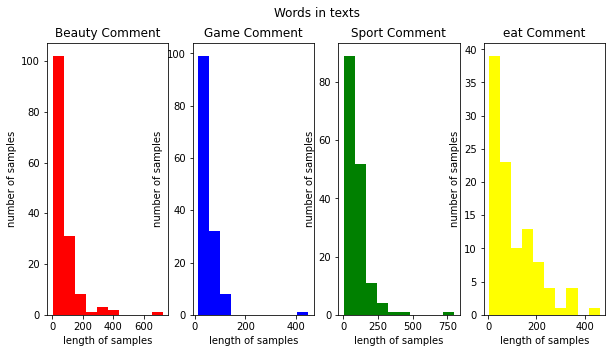

In [ ]:
fig,(ax1,ax2,ax3,ax4) = plt.subplots(1,4,figsize=(10,5))

text_len = train_data[train_data['label']==0]['tokenized'].map(lambda x: len(x))
ax1.hist(text_len, color='red')
ax1.set_title('Beauty Comment')
ax1.set_xlabel('length of samples')
ax1.set_ylabel('number of samples')
print('뷰티 영상 댓글의 평균 길이 :', np.mean(text_len))

text_len = train_data[train_data['label']==1]['tokenized'].map(lambda x: len(x))
ax2.hist(text_len, color='blue')
ax2.set_title('Game Comment')
fig.suptitle('Words in texts')
ax2.set_xlabel('length of samples')
ax2.set_ylabel('number of samples')
print('게임 영상 댓글의 평균 길이 :', np.mean(text_len))


text_len = train_data[train_data['label']==2]['tokenized'].map(lambda x: len(x))
ax3.hist(text_len, color='green')
ax3.set_title('Sport Comment')
fig.suptitle('Words in texts')
ax3.set_xlabel('length of samples')
ax3.set_ylabel('number of samples')
print('운동 영상 댓글의 평균 길이 :', np.mean(text_len))

text_len = train_data[train_data['label']==3]['tokenized'].map(lambda x: len(x))
ax4.hist(text_len, color='yellow')
ax4.set_title('eat Comment')
fig.suptitle('Words in texts')
ax4.set_xlabel('length of samples')
ax4.set_ylabel('number of samples')
print('먹방 영상 댓글의 평균 길이 :', np.mean(text_len))



plt.show()

In [ ]:
#토큰화하기 

In [ ]:
X_train = []
for sentence in train_data['comment_text']:
    temp_X = okt.morphs(sentence, stem=True) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    X_train.append(temp_X)

In [ ]:
print(X_train[:3])

[['어디', '내놓다', '부끄럽다', '우리', '형', '쫌', '챙', '피해', '차살', '따다', '숄프', '옵션', '확인', '되다', '뒤', '여자', '놈', '보다', '보다', '같다', '형', '짜증', '내다', '같다', '눈치', '보다', '작다', '소리', '지르다', '닼'], ['햇님', '입맛', '없다', '입맛', '찾다', '먹다', '보다', '보통', '라면', '먹방', '이렇게', '억지로', '먹다', '꾸역꾸역', '자극', '적', '기록', '세우다', '먹방', '여기다', '허세', '청정', '구', '역임', '먹방', '수년', '차', '에도', '부끄럽다', '먹다', '양', '줄이다', '화면', '띄우다', '그녀', '구', '독자', '천천히', '늘', '지만', '순수', '코리안', '구', '독자', '보유', '위', '같다', '한국', '먹방', '기일', '순위', '라고', '봄', '댓글', '죄다', '한국어', '거짓말', '투성이', '방송', '달다', '먹다', '예요', '설마', '누나', '왜', '자꾸', '섬네일', '과일', '먹다', '척해'], ['우리', '팀', '유미', '만년', '서리', '사고', '박은이', '유', '라면', '들다', '장인', '첨', '보다', '유민', '장인', '꿀팁', '왜', '안녕하다', '여러분', '이번', '장인', '초대', '석', '나오다', '크다', '복', '평소', '유미', '인식', '너무', '좋다', '이번', '맘', '먹다', '멋지다', '모습', '보이다', '드리다', '싶다', '너무', '긴장', '그래도', '옆', '친절하다', '많이', '도와주다', '테스', '터훈', '매니저', '그리고', '편집', '잘해주다', '편집자', '들다', '너무', '너무', '감사', '드리다', '방송', '나오다', '곱다', '기르다', '막', '

In [ ]:
print(X_train[1])

['햇님', '입맛', '없다', '입맛', '찾다', '먹다', '보다', '보통', '라면', '먹방', '이렇게', '억지로', '먹다', '꾸역꾸역', '자극', '적', '기록', '세우다', '먹방', '여기다', '허세', '청정', '구', '역임', '먹방', '수년', '차', '에도', '부끄럽다', '먹다', '양', '줄이다', '화면', '띄우다', '그녀', '구', '독자', '천천히', '늘', '지만', '순수', '코리안', '구', '독자', '보유', '위', '같다', '한국', '먹방', '기일', '순위', '라고', '봄', '댓글', '죄다', '한국어', '거짓말', '투성이', '방송', '달다', '먹다', '예요', '설마', '누나', '왜', '자꾸', '섬네일', '과일', '먹다', '척해']


In [ ]:
X_test = []
for sentence in test_data['comment_text']:
    temp_X = okt.morphs(sentence, stem=True) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    X_test.append(temp_X)

In [ ]:
#정수 인코딩 
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [ ]:
print(tokenizer.word_index)

{}


In [ ]:
threshold = 3
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 7755
등장 빈도가 2번 이하인 희귀 단어의 수: 5022
단어 집합에서 희귀 단어의 비율: 64.75822050290135
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 14.467740067184062


In [ ]:
# 전체 단어 개수 중 빈도수 2이하인 단어는 제거.
# 0번 패딩 토큰을 고려하여 + 1
vocab_size = total_cnt - rare_cnt + 1
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 2734


In [ ]:
tokenizer = Tokenizer(vocab_size) 
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [ ]:
print(X_train[:3])

[[615, 2095, 1248, 91, 35, 1430, 466, 520, 8, 352, 393, 521, 1, 1, 6, 35, 315, 6, 2096, 1, 376, 202, 856, 1691], [958, 959, 13, 959, 244, 10, 1, 960, 165, 95, 54, 1249, 10, 2097, 522, 26, 1082, 1692, 95, 857, 59, 95, 394, 203, 1248, 10, 225, 1250, 1431, 1693, 1251, 59, 113, 616, 298, 440, 59, 113, 106, 6, 565, 95, 2098, 122, 858, 44, 1432, 137, 353, 10, 377, 859, 42, 720, 2099, 2100, 10], [91, 783, 860, 2101, 2102, 1433, 256, 165, 16, 395, 523, 1, 395, 566, 42, 204, 47, 185, 395, 721, 861, 37, 58, 1252, 414, 860, 2103, 7, 3, 185, 567, 10, 354, 209, 66, 38, 65, 7, 1434, 299, 441, 1435, 18, 722, 2104, 127, 245, 2105, 489, 16, 7, 7, 197, 38, 137, 37, 2106, 784, 316, 2107, 662, 26, 209, 355, 1694, 6, 257, 152, 2101, 2102, 860, 862, 9, 1695, 378, 117, 863, 209, 66, 961, 2, 1436, 186, 1083, 1, 2108, 524, 415, 19, 118, 568, 2109, 2110, 1, 395, 721, 861, 237, 663]]


In [ ]:
y_train = np.array(train_data['label'])
y_test = np.array(test_data['label'])

In [ ]:
#빈샘플 제거하기
drop_train = [index for index, sentence in enumerate(X_train) if len(sentence) < 1]

In [ ]:
# 빈 샘플들을 제거
X_train = np.delete(X_train, drop_train, axis=0)
y_train = np.delete(y_train, drop_train, axis=0)
print(len(X_train))
print(len(y_train))

550
550


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


댓글의 최대 길이 : 687
댓글의 평균 길이 : 67.12727272727273


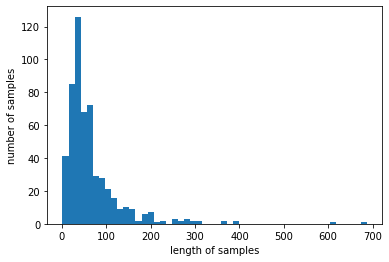

In [ ]:
#패딩
print('댓글의 최대 길이 :',max(len(l) for l in X_train))
print('댓글의 평균 길이 :',sum(map(len, X_train))/len(X_train))
plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [ ]:
def below_threshold_len(max_len, nested_list):
  cnt = 0
  for s in nested_list:
    if(len(s) <= max_len):
        cnt = cnt + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))*100))

In [ ]:
max_len = 400
below_threshold_len(max_len, X_train)

전체 샘플 중 길이가 400 이하인 샘플의 비율: 99.63636363636364


In [ ]:
X_train = pad_sequences(X_train, maxlen = max_len)
X_test = pad_sequences(X_test, maxlen = max_len)

In [ ]:
X_test.shape

(132, 400)

In [ ]:
X_train.shape

(550, 400)

In [ ]:
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, 4)
y_test = to_categorical(y_test, 4)

In [ ]:
model = Sequential()
model.add(Embedding(vocab_size, 100))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(4, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

epochs = 5
batch_size = 64

#model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=15, callbacks=[es, mc], batch_size=60, validation_split=0.2)

Epoch 1/15
8/8 [==============================] - 12s 1s/step - loss: 1.3848 - accuracy: 0.2678 - val_loss: 1.3771 - val_accuracy: 0.3091
Epoch 2/15
8/8 [==============================] - 9s 1s/step - loss: 1.3627 - accuracy: 0.4592 - val_loss: 1.3572 - val_accuracy: 0.3091
Epoch 3/15
8/8 [==============================] - 9s 1s/step - loss: 1.3198 - accuracy: 0.4381 - val_loss: 1.3197 - val_accuracy: 0.4091
Epoch 4/15
8/8 [==============================] - 9s 1s/step - loss: 1.2073 - accuracy: 0.5653 - val_loss: 1.2412 - val_accuracy: 0.4182
Epoch 5/15
8/8 [==============================] - 9s 1s/step - loss: 0.9787 - accuracy: 0.6349 - val_loss: 1.0975 - val_accuracy: 0.5727
Epoch 6/15
8/8 [==============================] - 9s 1s/step - loss: 0.7704 - accuracy: 0.8228 - val_loss: 1.0532 - val_accuracy: 0.6091
Epoch 7/15
8/8 [==============================] - 9s 1s/step - loss: 0.6631 - accuracy: 0.8212 - val_loss: 0.9144 - val_accuracy: 0.6364
Epoch 8/15
8/8 [========================

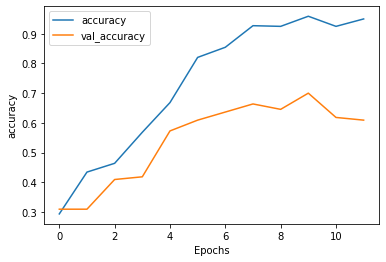

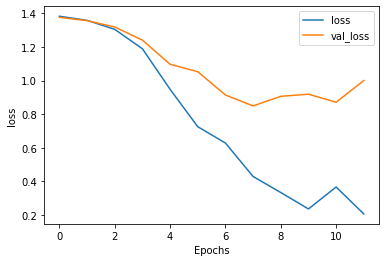

In [ ]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")


In [ ]:
#loaded_model = load_model('best_model.h5')
#print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, y_test)[1]))

In [ ]:
#loaded_model.summary()

In [ ]:
#댓글의 카테고리를 예측하는 프로그램 만들기

In [ ]:
def sentiment_predict(new_sentence):
  new_sentence = okt.morphs(new_sentence, stem=True) # 토큰화
  new_sentence = [word for word in new_sentence if not word in stopwords] # 불용어 제거
  encoded = tokenizer.texts_to_sequences([new_sentence]) # 정수 인코딩
  pad_new = pad_sequences(encoded, maxlen = max_len) # 패딩
 # print(pad_new)
  score = model.predict(pad_new) # 예측

 #if(score > 0.5):
  #  print("{:.2f}% 확률로 긍정 리뷰입니다.\n".format(score * 100))
 #else:
  #  print("{:.2f}% 확률로 부정 리뷰입니다.\n".format((1 - score) * 100))
  return score

In [ ]:
##str(dataset.loc[[0],['comment_text']])

In [ ]:
test_data

,title,view,like,unlike,comment,date,comment_text,뷰티,게임,운동,label
158,[배틀그라운드] 뜨뜨뜨뜨(QUAD) - 솔로 15킬 우승! 친구야 길리슈트 고맙다!...,2258011,7400,628,813,2017.9.12,그렇게 길리슈트와 배율은 아무의미가 없었다 진짜 개잘쏘네 살벌하다 기만자같으니 길리...,0,1,0,1
500,얼룩덜룩 쉐딩은 이제 그만 왕초보도 쉽게하는 쉐딩 방법 (feat조효진 쉐딩) :...,203571,3900,67,520,2021.4.30,언니야 다음엔 뒤집어진 피부 진정이랑 트러블 가리는법이랑 피부도 해줘유 사랑하여 언...,1,0,0,0
396,피온4 제 동갑 친구들 전부 월클이네요 | 91년생 축구 선수 스쿼드,98385,1300,43,252,2021.4.28,여기서 가장 놀라운 점박성주는 년생이다 아 성주님 대인줄 알았는데 가 임을 증명하는...,0,1,0,1
155,배그 대회에서 역대급 캐리를 2번이나?? (지스타 배그 멸망전) - [배틀그라운드],2713849,19000,562,2787,2018.11.16,홀수 공포증 있어요 홀수면 짝수로 바꿔주세요 이러면 관심 받겠다 킥킥 하하하사 뜨뜨...,0,1,0,1
321,단 3분만에 허벅지 안쪽살 정리해드립니다,1474164,좋아요,싫어요,2650,2020.10.8,심장 입으로 튀어나올라 한거 간신히 넣었네 휴 남돌 직캠 분은 걍 초도 안걸리는 거...,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...
424,출산 인사 드립니다 이렇게 생겼어요 조리원 스킨케어까지,525280,13000,141,957,2021.3.27,진짜 유튜브 유씨다 좋은데 걱정되고 걱정된다고 하면 언니가 걱정한다고 미안해할것같고...,1,0,0,0
515,가짜사나이 2기 지원합니다(체력평가),1343363,19000,582,5443,2020.8.16,피지컬갤러리 채널에 컷편집 없이 진행해야한다 명시되어있어 무편집으로 진행했습니다 합...,0,0,1,2
24,여성 구독자 운동 피드백 (part 3),841805,4900,225,786,2020.1.26,아이구야 얼굴이 화끈화끈합니다 꿈같은 선생님께서 제 운동하는것 봐주셔서 너무나 염광...,0,0,1,2
218,모든것을 무기로 쓰는 게임,1658663,14000,697,1242,2019.9.22,계속 눌러보셈 이게 그 전설의 여동생을 무기로 팔 수 있는 인성겜인가요 아니 자막 ...,0,1,0,1


In [ ]:
test_data.iloc[0:1,6].values

array(['그렇게 길리슈트와 배율은 아무의미가 없었다 진짜 개잘쏘네 살벌하다 기만자같으니 길리입고 존버를 뚫지않나 찾아가서 죽이질않나 마지막 나야 저거미친놈처럼 차타고 오더니 샷건스무스하게 맞췄는데 안죽어서 존나빡쳤는데 뜨뜨였어 존나신기하다 길리얻 '],
      dtype=object)

In [ ]:
sentiment_predict(test_data.iloc[0:1,6].values[0])

array([[0.00776077, 0.63463944, 0.331746  , 0.02585387]], dtype=float32)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred_ = []
for i in range(len(y_pred)):
  arg = np.argmax(y_pred[i])
  y_pred_.append(arg)


In [ ]:
y_pred[:3]

array([[1.4765404e-02, 1.2619819e-01, 8.6973317e-02, 7.7206314e-01],
       [9.9207366e-01, 3.0609248e-03, 4.1690255e-03, 6.9639523e-04],
       [2.0714968e-01, 3.7500212e-01, 1.7931554e-01, 2.3853274e-01]],
      dtype=float32)

In [ ]:
y_pred_[:3]

[3, 0, 1]

In [ ]:
y_train_ = []
for i in range(len(y_train)):
  arg = np.argmax(y_train[i])
  y_train_.append(arg)

In [ ]:
y_train_[:3]

[3, 3, 1]

성능 테스트

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
y_test_ = []
for i in range(len(y_test)):
  arg = np.argmax(y_test[i])
  y_test_.append(arg)

In [ ]:
y_test[:3]

array([[0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.]], dtype=float32)

In [ ]:
y_test_[:3]

[1, 0, 1]

In [ ]:
print(classification_report(y_pred_,y_test_))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86        20
           1       0.48      0.96      0.64        26
           2       0.69      0.80      0.74        30
           3       0.91      0.38      0.53        56

    accuracy                           0.67       132
   macro avg       0.72      0.76      0.69       132
weighted avg       0.76      0.67      0.65       132



# 영상 댓글만으로 분석할 시 case study

In [ ]:
import numpy as np

a = np.array(y_pred_)
b = np.array(y_test_)
c = a==b
np.where(c==False)




(array([  2,   5,  13,  14,  15,  17,  18,  20,  23,  25,  28,  29,  30,
         34,  36,  38,  43,  47,  49,  53,  57,  59,  62,  65,  67,  68,
         78,  79,  82,  86,  89,  90,  95,  99, 101, 104, 107, 108, 110,
        111, 112, 113, 115, 118, 131]),)

In [ ]:
print(test_data['comment_text'].iloc[2])
print(y_pred_[2])
print(y_test_[2])

여기서 가장 놀라운 점박성주는 년생이다 아 성주님 대인줄 알았는데 가 임을 증명하는 영상 오늘 영상 키 포인트 박성주가 년생 이라는것 쟤내가 아직 년생이라는것 똥싸는거 직관 
1
1


In [ ]:
print(test_data['title'].iloc[2])
print(y_pred_[2])
print(y_test_[2])

피온4 제 동갑 친구들 전부 월클이네요 | 91년생 축구 선수 스쿼드
1
1


In [ ]:
print(test_data['comment_text'].iloc[5])
print(y_pred_[5])
print(y_test_[5])
print(test_data['title'].iloc[5])
print(y_pred_[5])
print(y_test_[5])

초딩들은 일루오지말고 안답답하고 시끄럽지 않은 도티잠뜰이나 보러가세요 도티님과 잠뜰님 등 어린 친구들이 주 시청자인 유튜버들에 대한 편견이 깨졌습니다 과거에 이런 댓글을 단 스스로가 참 부끄러워지네요 띠또 화이팅 원래 몇번씩 죽어가면서 깨닫는건데 훈수 겁나 하네 재미없고 노잼이고 억지로하는거 보인다고 그럼 왜 왔어 죽어 일부러 죽는게 아니라 원래 바보같고 시끄럽고 거칠고 따뜻한 사람이에요 안맞으시면 그냥 넘어가주세요이 채널은 공략방송이 아니기도 하고 완벽한걸 원하시면 다른거 보세요 안녕하세요 머독입니다 다음에는 더 재밌게 하겠습니다 고맙습니다 
3
1
[직진게임] 오로지 직진만 해야하는게임 속임수에 넘어가면 죽음2018년 10월 9일
3
1


In [ ]:
print(test_data['comment_text'].iloc[17])
print(y_pred_[17])
print(y_test_[17])

조인극 맨날 올라와서 넘 좋아 언니 미안해썸네일보고 짜파게티와 함께한 박진영 자기야 왜 칭얼거려짤인줄 알았어 언니 편의점 알바하면서 영상 봤는데 깜빡하고 에어팟 안 껴서 인트로가 우렁차게 흘러나왔 덕분에 계산하러 오신 어르신께서 어린 분이 인간극장 보나보네 하셨어요 민망민망 닥터자르트 덕후 선생님들 이번에 닥자 시카페어 행사를 한다고하여 달려왔습니다 닥터자르트 공식 홈페이지 시카페어 익스프레스 프로모션 매일매일 달라지는 시카페어 혜택 기간 링크 시카페어 토너 원 더마 코튼 패드 매 원 시카페어 세럼 원 시카페어 크림 원 분명 닥터자르트 최종본 이었는데못 본척 해쥬기 
1
3


In [ ]:
print(test_data['title'].iloc[17])
print(y_pred_[17])
print(y_test_[17])

(with Subs) 조효진의 인간극장 - 제5부 오늘은 내가 요리사 :: Hyojins VLOG
1
3


In [ ]:
print(test_data['comment_text'].iloc[18])
print(y_pred_[18])
print(y_test_[18])

협찬이라 맛있다고 말은 해야겠고 근데 뒤지게 맵고 아 두 개의 자아가 싸우는 느낌이랄까 저 여기 최애 장면이니까 누가 좋아요 좀 주기적으로 눌러주세요 아니면 뭐 내가 알아서 들어오지 음식구성도 존나 웃기다고 실비김치가 중간에 있어야 되는거아님 원래 댓글 안다는 사람인데 이 사람은 뭐지 진짜 미친사람 같앜 분명 첫 영상은 버블티였는데 한개씩 정주행 하고 있는 나 진짜 너무 웃겨욬 자기몸에서 나는 소린데 표정뭐냐곸 
1
3


In [ ]:
print(test_data['title'].iloc[18])
print(y_pred_[18])
print(y_test_[18])

SUB)나울어매운실비김치 통스팸 짜파게티 리얼사운드 먹방ASMRTHE SPICIEST KOREAN KIMCHI 辛いキムチ  Korean Mukbang
1
3


In [ ]:
print(test_data['comment_text'].iloc[20])
print(y_pred_[20])
print(y_test_[20])

진짜 믿고 보는 고멤 분 순삭 당했습니다 길이길이 남을 역작 번째 돌려보는중 고멤은 지옥이다 팀장꼰대진상할배호를 맡은 띵킹입니다 고멤은 지옥이다 정말 함께해주신 모든 분들 각본쓰고 연기해주신 고멤 여러분 맵 제작의 킴카멘님 잉푸님 저는 차려놓은 밥상에 그저 숟가락 하나만 올려놨을 뿐입니다 모두 함께 이런 좋은 작품 만들수 있어서 너무 행복하고 감사했습니다 앞으로 고멤 활동 열심히 하고 항상 재밌는 띵킹이 되겠습니다 왁굳님 항상 존경하고 사랑합니다 감사합니다 컨텐츠 일주일 남기고 아무것도 없이 모였습니다 고멤 모두가 일주일 내내 매일 밤새면서 머리싸매고 다같이 세계관스토리연출 아이디어 내가면서 열심히 했습니다 저희가 고멤이었기에 열정하나로 모인거였기에 좋은 결과가 나왔던것같아요 그렇기에 고멤이 아니신데도 매일 밤새며 맵 만드셨던 맵 제작자분들이 정말 대단했던것같습니다 맵 제작자분들 고멤분들 다들 정말 고생하셨습니다 제 입장의 비하인드 제가 고기를 씹는장면때는 동동쿤님이 풀트래킹으로 몸연기를하고 저는 고기를 씹는 소리만 냈습니다 저는 사람고기를 씹는 소리를 연출하기위해 육회만원어치를 깍둑썰기로 준비해 씹었습니다 육회를 먹어보는게 처음이었는데 막상 씹어보니 씹는소리는 잘 났지만 연기하며 삼키기가 너무 버거워 휴지에 뱉고 새로운 고기를 씹고를 반복했습니다 최종리허설까지도 없었는데 실전때 과몰입을 너무 하다보니 마지막 추격장면때 왁굳님이 저와 주르르님 사이를 방해한다고 생각이 드니 너무 속상하고 분해서 눈물이 흐르더라구요 주르르님 연습할땐 연기 못했는데 실전때 저 경멸하는 연기가 나오길래 진짜 저를 경멸하나싶었습니다주륵 재밌게 봐주신 여러분 정말 감사합니다 덕분에 저희 모두 매일 밤새며 고생했던게 더 보람있었던것같습니다 앞으로도 왁굳님의 고멤 컨텐츠 많이 좋아해주시고 응원해주시면 감사하겠습니다 감정에 벅차 눈물이 글썽이지만 다급하게 숨기며 뒤로도는 냉참 감 감사합니다 그리고 저 실제로 안저래요착해요 미쳤다이건진짜 와 회차 시청중이신 분은 좋아요를 늘러주세요 
2
1


In [ ]:
print(test_data['comment_text'].iloc[21])
print(y_pred_[21])
print(y_test_[21])

저도 노브랜드 제품들 너무 좋아해요 여기 나온것들 다 좋아한다는건 안 비밀 가성비가 진짜 좋은 것 같아요 머리에 왕먼지 붙었어요 거슬리게해서 죄송합니다 담엔 꼭 영상 찍기 전에 확인 할게요오 머리삼각김밥 노브랜드는원참좋아하는듯 여러분 이번에도 알람 안 갔나요오 
2
3


In [ ]:
print(test_data['comment_text'].iloc[24])
print(y_pred_[24])
print(y_test_[24])

간증댓글 남깁니다 맨날 그냥 틴트바르면 너무 건조하고 각질경계안쪽으로만 착색되고 립밤바르고 발라도 지속력만 떨어지고 했던 사람인데 두콩언니 말대로 하니까 진짜 하루종일 윤기나면서 덜 건조하고 착색도 더럽게 안되고 매끈하고 자연스럽게 유지돼요 저는 차앤박 프로폴리스 앰플 썻어요 두콩쓰 꿀팁 이즈 베스트 여러분 브랜드없는 길거리에 파는 안경이에요 담부터 브랜드로 사볼게 대충 막바르고 음마음마하고 나갔다구요 안돼요 단계별로 차근차근 바르고 티슈로 착색 확인사살 꼭 하고 나가기 설명때매 단계가 많아보이지만 바르는데 분도 안걸려요 그리고 앰플 없으시면 스킵해주세요 여러분 어떤 연두부님이 술먹기 전에 이렇게 바르면 절대 거울 볼 일없다고 아 술먹고싶다 아무말 틴트마다 다르겠지만 너무 물완전 물 틴트는 저도 잘 얼룩지더라구요 사용한 컬러그램 썬더볼틴트 라이트닝은 물 젤 중간 제품이니 참고해주세요 
2
0


In [ ]:
print(test_data['comment_text'].iloc[28])
print(y_pred_[28])
print(y_test_[28])

여러분은 어떤 맛 드실래요 영상에서는 과일별로 한입만 베어 먹지만 실제로 촬영할 때는 가장 예쁜컷을 고르기 위해 몇십개의 탕후루를 먹었어요 저거 촬영하고 바로 김치찌개 먹으러 갔다는    
3
0


In [ ]:
print(test_data['title'].iloc[28])
print(y_pred_[28])
print(y_test_[28])

탕후루맛zip 탕후루 광택 틴트 추천 + 오버립  메이크업  * OVERLINE LIPS TUTORIAL * LIP SWATCHES
3
0


In [ ]:
print(test_data['comment_text'].iloc[34])
print(y_pred_[34])
print(y_test_[34])
print(test_data['title'].iloc[34])

누누더러워먹는거역겨워재생엄청나무서워라인클리어왜이래 아 하필 저랑 하실때 어머니가 부르셔서 그쵸 텔론님패드립 절대 아닙니다 텔론도 맘먹고 했으면 챌 달을듯 저 김만덕씨 계좌번호 확인 좀 다시 해주세요 입금이 안됐는데 죄송훱니다 텔청자님덜 텔론님의 루시안이 이렇게 셀 줄은 편집자형님 감사드려요 
3
1
늬들은 훈수하지마라나부터 이기고 훈수해라★쌉졸렬 5단계★ 시청자 1대1 대전


In [ ]:
print(test_data['comment_text'].iloc[36])
print(y_pred_[36])
print(y_test_[36])
print(test_data['title'].iloc[36])

다이어트 하지맙시다 그냥 먹고 운동하면되는거 아니겠습니까 솔직히 먹는게 너무 좋아서 못참겠습니다 오늘부로 운동먹방유튜버합니다 영상 속에 나온 볶음밥 제품 링크입니다 링크 클릭 후 회원가입만하시면 저렴하게 많은 다이어트식품을 구매하실수있습니다 필요하신분들은 많은 이용 부탁드립니다 오프닝 혈색 안좋았는데 식사 및 운동후 급격히 좋아짐 첫끼니로 천칼로리 박는데 이걸 실패하겠냐고 아프리카 시청자 명이였을때 도대체 왜 인기가 없을까 했는데 오랜만에 들어와 보니까 역시나 성공하셨군요 번창하시길 바랍니다 자메이카 통다리 최애 치킨인데 대퇴사두가 제법 웅장해집니다 다이어트라 먹방유튜브 보는데 지피티님께 제일 제법입니다 
3
2
다이어트 다 때려치우고 하루만에 10000Kcal 먹어봤습니다 (10000Kcal challenge)


In [ ]:
print(test_data['comment_text'].iloc[37])
print(y_pred_[37])
print(y_test_[37])
print(test_data['title'].iloc[37])

뒤에 보라고 이자식아 라고 하시면서 정작 본인 뒤는 못보심 마지막 말에서 한번더 터졌네요 진짜 같답니다 이 영상을 안본사람은 있어도 한번만 본사람은 없을것이다 앜진짜 이거 생방 때 미친듯이 웃었는데 다시 봐도 너무 웃기당 윰댕님 웃는거봨 놀래키면서 만족한 표정 
0
1
대도서관] 윰댕님의 손길 한번에 대깜놀한 사연은? (키친 VR 실황 中)


In [ ]:
print(test_data['comment_text'].iloc[38])
print(y_pred_[38])
print(y_test_[38])
print(test_data['title'].iloc[38])

이런 장르는 처음인데 오히려 어쩡쩡하게하는 것보다 이렇게 아예 전문적으로 해버리니까 확실히 예술같아서 거부감이 줄어든다 하나의 작품으로 인식이 되는듯 워 저 나나라는 분 진짜 카리스마 사람을 매혹하는 게 엄청나다 드랙퀸이 뭔진 몰라도 메이크업 과정을 다 봤음에도 올드레스업하고 웃을 때 완전히 매혹됨을 느낌 솔직히 드랙퀸에 대해선 지금 굉장히 논란이 많음 나는 개인이 드랙을 왜 하고싶은지를 취향으로써 존중도 하지만 한편으로는 드랙의 논쟁거리에 대해서도 어느정도 동의를 하는사람임 그래서 내 시선도 딱히 고운 편은 아닌데 그냥 이 영상 끝까지 보고나니까 메컵후 끼쟁이 타임에서 끼부리는걸 보고있자니 그냥 참 예쁘다는 생각이 들었음 레제님 왜 배게 솜을 쓰고 오셨어욬 나비가사람이되면 이런기분일것같다 
1
0
무려 11년차 드랙퀸 해외공연에 뮤비까지


#2. 제목만으로 분류하기


In [ ]:
dataset1 = pd.read_csv('result_먹방추가.csv',encoding='cp949')

In [ ]:
X1  = dataset['title']
y1  = dataset['label']

In [ ]:
from sklearn.model_selection import train_test_split

# train_test_split
train_data , test_data = train_test_split(dataset, test_size=0.2, random_state=42)



In [ ]:
train_data.drop_duplicates(subset = ['title'], inplace=True) # document 열에서 중복인 내용이 있다면 중복 제거
train_data['title'] = train_data['title'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") # 정규 표현식 수행
train_data['title'] = train_data['title'].str.replace('^ +', "") # 공백은 empty 값으로 변경
train_data['title'].replace('', np.nan, inplace=True) # 공백은 Null 값으로 변경
train_data = train_data.dropna(how='any') # Null 값 제거
print('전처리 후 테스트용 샘플의 개수 :',len(train_data))

전처리 후 테스트용 샘플의 개수 : 558


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user

In [ ]:
test_data.drop_duplicates(subset = ['title'], inplace=True) # document 열에서 중복인 내용이 있다면 중복 제거
test_data['title'] = test_data['title'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") # 정규 표현식 수행
test_data['title'] = test_data['title'].str.replace('^ +', "") # 공백은 empty 값으로 변경
test_data['title'].replace('', np.nan, inplace=True) # 공백은 Null 값으로 변경
test_data = test_data.dropna(how='any') # Null 값 제거
print('전처리 후 테스트용 샘플의 개수 :',len(test_data))

전처리 후 테스트용 샘플의 개수 : 140


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user

In [ ]:
train_data['tokenized'] = train_data['title'].apply(okt.morphs)
train_data['tokenized'] = train_data['tokenized'].apply(lambda x: [item for item in x if item not in stopwords])

In [ ]:
beauty = np.hstack(train_data[train_data.label == 0]['tokenized'].values)
game = np.hstack(train_data[train_data.label == 1]['tokenized'].values)
sport = np.hstack(train_data[train_data.label == 2]['tokenized'].values)
eat = np.hstack(train_data[train_data.label == 3]['tokenized'].values)

In [ ]:
beauty_word_count = Counter(beauty)
print(beauty_word_count.most_common(20))

[('메이크업', 90), ('법', 17), ('틴트', 14), ('같이', 14), ('추천', 13), ('준비', 13), ('데', 11), ('일리', 10), ('이사배', 10), ('뷰티', 10), ('바르는', 9), ('템', 9), ('해요', 9), ('윤쨔미', 9), ('화장', 8), ('로드', 8), ('샵', 8), ('피부', 7), ('화장품', 7), ('유나', 7)]


In [ ]:
game_word_count = Counter(game)
print(game_word_count.most_common(20))

[('게임', 23), ('마인크래프트', 14), ('대', 12), ('양띵', 11), ('레전드', 11), ('배틀', 10), ('라운드', 10), ('화', 9), ('악어', 8), ('뜨', 8), ('어스', 7), ('핵', 7), ('롤', 7), ('편', 7), ('테스', 6), ('터훈', 6), ('감스트', 6), ('명', 6), ('탈출', 6), ('도서관', 6)]


In [ ]:
sport_word_count = Counter(sport)
print(sport_word_count.most_common(20))

[('운동', 60), ('요가', 20), ('스트레칭', 16), ('법', 14), ('어깨', 13), ('살', 13), ('루틴', 12), ('방법', 11), ('팔뚝', 10), ('하세요', 9), ('타', 9), ('다이어트', 9), ('빼는', 8), ('바타', 8), ('전신', 8), ('위', 8), ('대', 8), ('슛포', 7), ('러브', 7), ('가지', 7)]


In [ ]:
eat_word_count = Counter(eat)
print(eat_word_count.most_common(20))

[('먹방', 83), ('리얼', 24), ('사운드', 23), ('밥', 14), ('도전', 11), ('먹으면', 10), ('히', 10), ('야식', 8), ('라면', 7), ('하루', 7), ('시간', 6), ('짜파게티', 6), ('요리', 6), ('만원', 6), ('사장', 6), ('웅', 5), ('등', 5), ('공짜', 5), ('원', 5), ('먹는', 5)]


In [ ]:
X_train1 = []
for sentence in train_data['title']:
    temp_X = okt.morphs(sentence, stem=True) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    X_train1.append(temp_X)


X_test = []
for sentence in test_data['title']:
    temp_X = okt.morphs(sentence, stem=True) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    X_test.append(temp_X)


In [ ]:
#정수 인코딩 
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train1)

In [ ]:
threshold = 3
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 2223
등장 빈도가 2번 이하인 희귀 단어의 수: 1745
단어 집합에서 희귀 단어의 비율: 78.49752586594691
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 41.21661142522909


In [ ]:
# 전체 단어 개수 중 빈도수 2이하인 단어는 제거.
# 0번 패딩 토큰을 고려하여 + 1
vocab_size = total_cnt - rare_cnt + 1
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 479


In [ ]:
tokenizer = Tokenizer(vocab_size) 
tokenizer.fit_on_texts(X_train1)
X_train1 = tokenizer.texts_to_sequences(X_train1)
X_test = tokenizer.texts_to_sequences(X_test)

y_train = np.array(train_data['label'])
y_test = np.array(test_data['label'])

#빈샘플 제거하기
drop_train = [index for index, sentence in enumerate(X_train1) if len(sentence) < 1]

# 빈 샘플들을 제거
X_train1 = np.delete(X_train1, drop_train, axis=0)
y_train = np.delete(y_train, drop_train, axis=0)
print(len(X_train1))
print(len(y_train))



551
551


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


댓글의 최대 길이 : 19
댓글의 평균 길이 : 5.471869328493648


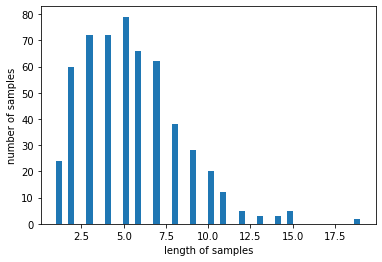

In [ ]:
#패딩
print('댓글의 최대 길이 :',max(len(l) for l in X_train1))
print('댓글의 평균 길이 :',sum(map(len, X_train1))/len(X_train1))
plt.hist([len(s) for s in X_train1], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [ ]:
max_len = 20
below_threshold_len(max_len, X_train1)

전체 샘플 중 길이가 20 이하인 샘플의 비율: 100.0


In [ ]:
X_train1 = pad_sequences(X_train1, maxlen = max_len)
X_test = pad_sequences(X_test, maxlen = max_len)

In [ ]:
#LSTM으로 유투브 댓글 분류하기
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, 4)
y_test = to_categorical(y_test, 4)


model = Sequential()
model.add(Embedding(vocab_size, 100))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(4, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

epochs = 5
batch_size = 64

#model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
history = model.fit(X_train1, y_train, epochs=15, callbacks=[es, mc], batch_size=60, validation_split=0.2)

Epoch 1/15
8/8 [==============================] - 4s 125ms/step - loss: 1.3811 - accuracy: 0.2658 - val_loss: 1.3563 - val_accuracy: 0.2613
Epoch 2/15
8/8 [==============================] - 1s 71ms/step - loss: 1.3419 - accuracy: 0.3544 - val_loss: 1.3317 - val_accuracy: 0.3964
Epoch 3/15
8/8 [==============================] - 1s 70ms/step - loss: 1.2964 - accuracy: 0.4700 - val_loss: 1.2735 - val_accuracy: 0.4775
Epoch 4/15
8/8 [==============================] - 1s 69ms/step - loss: 1.2149 - accuracy: 0.6636 - val_loss: 1.1956 - val_accuracy: 0.5225
Epoch 5/15
8/8 [==============================] - 1s 70ms/step - loss: 1.0772 - accuracy: 0.7329 - val_loss: 1.0283 - val_accuracy: 0.5495
Epoch 6/15
8/8 [==============================] - 1s 70ms/step - loss: 0.8271 - accuracy: 0.7847 - val_loss: 0.8540 - val_accuracy: 0.7117
Epoch 7/15
8/8 [==============================] - 1s 69ms/step - loss: 0.5933 - accuracy: 0.8878 - val_loss: 0.7297 - val_accuracy: 0.6847
Epoch 8/15
8/8 [==========

In [ ]:
y_pred = model.predict(X_test)

y_pred_ = []
for i in range(len(y_pred)):
  arg = np.argmax(y_pred[i])
  y_pred_.append(arg)


y_train_ = []
for i in range(len(y_train)):
  arg = np.argmax(y_train[i])
  y_train_.append(arg)


y_test_ = []
for i in range(len(y_test)):
  arg = np.argmax(y_test[i])
  y_test_.append(arg)

print(classification_report(y_pred_,y_test_))

              precision    recall  f1-score   support

           0       1.00      0.61      0.76        44
           1       0.74      0.95      0.83        41
           2       0.65      1.00      0.79        24
           3       0.87      0.65      0.74        31

    accuracy                           0.79       140
   macro avg       0.81      0.80      0.78       140
weighted avg       0.83      0.79      0.78       140



In [ ]:
X_train

array([[   0,    0,    0, ...,  202,  856, 1691],
       [   0,    0,    0, ..., 2099, 2100,   10],
       [   0,    0,    0, ...,  861,  237,  663],
       ...,
       [   0,    0,    0, ...,    4, 2273,  341],
       [   0,    0,    0, ...,  251,  577,  432],
       [   0,    0,    0, ...,   51, 2729,  935]], dtype=int32)

In [ ]:
X_train1

array([[  0,   0,   0, ...,   1, 323,   1],
       [  0,   0,   0, ..., 324,  21, 136],
       [  0,   0,   0, ...,  15,  33,   5],
       ...,
       [  0,   0,   0, ..., 143, 469,  93],
       [  0,   0,   0, ...,   2, 215,  36],
       [  0,   0,   0, ...,  21, 206,  45]], dtype=int32)

#3.  정확가 높지 않아서 제목을 변수로 추가

In [ ]:
dataset = pd.read_csv('result_먹방추가.csv',encoding='cp949')

In [ ]:
X1 = dataset[['title','comment_text']]
y1 = dataset['label']

In [ ]:
X1

,title,comment_text
0,웜 청초 메이크업 Warm Transparent Makeup,유료 광고 없는게 거의 없네 뒷광고 전에 이분이 설명하시는거 좋아보여서 많이 따라...
1,문수진X포니 저 달(the moon) 라이브 클립 메이크업 MOON SUJIN X ...,닮았다 자매인줄 포니화가 잘된듯
2,Matte Caramel Makeup 매트 캬라멜 메이크업,광고 없는 찐템들도 보고싶어요 요즘 옛날 영상들 돌려보고 있는데 그때 언니가 쓰던...
3,싱그러운 오후 메이크업Golden Hour Glow Makeup,포니님 역시 프로시다 노랑볼터치 망한거같았는데 프로의 손길로 더 예쁘게 바르심...
4,방구석 셀피 메이크업 Chilling at Home Selfie Makeup,나만 광고 들어올때만 영상찍는 느낌이냐 옛날의 집구석 겟레디가 그립다 진짜 광고...
...,...,...
695,SUB) [도전먹방] 제한시간 40분 일반인분들은 아직까지 성공한 사람이 없다는 그...,저렇게 해서 만원이면 그냥도 괜찮은 구성인거 같아여 아 성공은 당연할거라구 생각했음...
696,[도전먹방] 일반위는 절대 따라 하지 마시오 라최몇 시즌 2 Challenge Mu...,이 아이가 배가 부르다는 느낌을 알까요 이정도면 설날에 할머니가 그만먹으라 할정도네...
697,한국 먹방 랭킹 1위 컨버터피자 내 기록이 깨졌다고 10분컷 간다 (with봉준x...,이분은 잘먹는분이 아닙니다 잘먹고 못먹고를 논할 급이 아님 기인이나 초능력자로 분류...
698,[도전먹방]일반인이 도전장을 내밀었다 일반인VS히밥 제한시간15분 잔치국수 5인분 ...,그러니까 이게 점심으로 햄버거 개 드시고 저녁밥으로 드신게 맞죠 유튭 시청자들은 모...


In [ ]:
from sklearn.model_selection import train_test_split

# train_test_split
train_data , test_data = train_test_split(dataset, test_size=0.2, random_state=42)

In [ ]:
train_data['tokenized'] = train_data['title'] + train_data['comment_text']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
test_data['tokenized'] = test_data['title'] + test_data['comment_text']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
train_data.drop_duplicates(subset = ['tokenized'], inplace=True) # document 열에서 중복인 내용이 있다면 중복 제거
train_data['tokenized'] = train_data['tokenized'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") # 정규 표현식 수행
train_data['tokenized'] = train_data['tokenized'].str.replace('^ +', "") # 공백은 empty 값으로 변경
train_data['tokenized'].replace('', np.nan, inplace=True) # 공백은 Null 값으로 변경
train_data = train_data.dropna(how='any') # Null 값 제거
print('전처리 후 테스트용 샘플의 개수 :',len(train_data))

test_data.drop_duplicates(subset = ['tokenized'], inplace=True) # document 열에서 중복인 내용이 있다면 중복 제거
test_data['tokenized'] = test_data['tokenized'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") # 정규 표현식 수행
test_data['tokenized'] = test_data['tokenized'].str.replace('^ +', "") # 공백은 empty 값으로 변경
test_data['tokenized'].replace('', np.nan, inplace=True) # 공백은 Null 값으로 변경
test_data = test_data.dropna(how='any') # Null 값 제거
print('전처리 후 테스트용 샘플의 개수 :',len(test_data))

전처리 후 테스트용 샘플의 개수 : 560
전처리 후 테스트용 샘플의 개수 : 140


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user

In [ ]:
train_data['tokenized'] = train_data['tokenized'].apply(okt.morphs)
train_data['tokenized'] = train_data['tokenized'].apply(lambda x: [item for item in x if item not in stopwords])

In [ ]:
beauty = np.hstack(train_data[train_data.label == 0]['tokenized'].values)
game = np.hstack(train_data[train_data.label == 1]['tokenized'].values)
sport = np.hstack(train_data[train_data.label == 2]['tokenized'].values)
etc = np.hstack(train_data[train_data.label == 3]['tokenized'].values)

In [ ]:
beauty_word_count = Counter(beauty)
print(beauty_word_count.most_common(20))

[('진짜', 153), ('메이크업', 151), ('언니', 133), ('영상', 130), ('완료', 113), ('너무', 101), ('화장', 67), ('얼굴', 59), ('피부', 56), ('사람', 55), ('많이', 52), ('정말', 41), ('보고', 40), ('말', 38), ('할', 37), ('적', 36), ('광고', 36), ('같아요', 35), ('뷰티', 34), ('추천', 33)]


In [ ]:
game_word_count = Counter(game)
print(game_word_count.most_common(20))

[('진짜', 71), ('게임', 58), ('영상', 52), ('사람', 42), ('너무', 39), ('형', 33), ('핵', 32), ('말', 30), ('레전드', 28), ('명', 27), ('적', 26), ('방송', 25), ('왜', 24), ('생각', 24), ('장인', 23), ('할', 22), ('욕', 22), ('악어', 21), ('보고', 21), ('야', 20)]


In [ ]:
sport_word_count = Counter(sport)
print(sport_word_count.most_common(20))

[('운동', 273), ('일차', 208), ('진짜', 145), ('영상', 138), ('너무', 109), ('일', 71), ('할', 66), ('오늘', 63), ('많이', 63), ('자세', 59), ('스트레칭', 55), ('정말', 54), ('사람', 54), ('몸', 54), ('적', 52), ('감사합니다', 51), ('요가', 50), ('월', 48), ('어깨', 46), ('선수', 44)]


In [ ]:
etc_word_count = Counter(etc)
print(etc_word_count.most_common(20))

[('먹방', 135), ('너무', 101), ('진짜', 92), ('치즈', 71), ('사람', 70), ('밥', 64), ('야식', 57), ('많이', 53), ('영상', 53), ('랑', 44), ('사장', 41), ('히', 39), ('구독', 36), ('할머니', 35), ('좋아요', 35), ('오늘', 35), ('라면', 34), ('먹는', 34), ('돈', 34), ('말', 33)]


In [ ]:
train_data['tokenized']

82         [요청, 폭주, 악녀, 되고, 싶은, 메이크업, 버건디, 겨울, 쿨톤, 메이크업]
51     [헬창, 오픈카, 안타, 되는, 이유, 어디, 내놔도, 부끄러운, 우리, 형, 쫌,...
220                     [말린, 장미, 맛, 립스틱, 틴트, 추천, 바르는, 법]
669    [입맛, 없어서, 과일, 먹방, 편, 방송, 편집, 버전, 햇님, 입맛, 없다, 입...
545    [유미, 원, 챔, 마스터, 티어, 달성, 딜량, 등, 만년, 서리, 템, 트리, ...
                             ...                        
71     [파밍, 귀찮은, 고인, 물의, 치킨, 먹기, 배틀, 라운드, 인물, 근황, 이제,...
106    [이천수, 평가, 이승우, 이강인, 냉정함, 주의, 채널, 장점, 홍명보, 황선홍,...
270    [세상, 제일, 맛있는, 젤리, 영, 양제, 보증, 리뷰, 미국, 과자, 화장품, ...
435    [팅구들, 양양, 피, 비치, 박일, 브이, 로그, 먹방, 나이트, 케어, 루틴, ...
102    [시대, 잘못, 타고난, 김병지, 킥, 실력, 현재, 프로, 에도, 되는, 골키퍼,...
Name: tokenized, Length: 560, dtype: object

In [ ]:
pip install jpype1==0.7.0

     |████████████████████████████████| 2.8MB 5.1MB/s 
  Found existing installation: JPype1 1.2.1
    Uninstalling JPype1-1.2.1:
      Successfully uninstalled JPype1-1.2.1


In [ ]:
train_data['tokenized']

82         [요청, 폭주, 악녀, 되고, 싶은, 메이크업, 버건디, 겨울, 쿨톤, 메이크업]
51     [헬창, 오픈카, 안타, 되는, 이유, 어디, 내놔도, 부끄러운, 우리, 형, 쫌,...
220                     [말린, 장미, 맛, 립스틱, 틴트, 추천, 바르는, 법]
669    [입맛, 없어서, 과일, 먹방, 편, 방송, 편집, 버전, 햇님, 입맛, 없다, 입...
545    [유미, 원, 챔, 마스터, 티어, 달성, 딜량, 등, 만년, 서리, 템, 트리, ...
                             ...                        
71     [파밍, 귀찮은, 고인, 물의, 치킨, 먹기, 배틀, 라운드, 인물, 근황, 이제,...
106    [이천수, 평가, 이승우, 이강인, 냉정함, 주의, 채널, 장점, 홍명보, 황선홍,...
270    [세상, 제일, 맛있는, 젤리, 영, 양제, 보증, 리뷰, 미국, 과자, 화장품, ...
435    [팅구들, 양양, 피, 비치, 박일, 브이, 로그, 먹방, 나이트, 케어, 루틴, ...
102    [시대, 잘못, 타고난, 김병지, 킥, 실력, 현재, 프로, 에도, 되는, 골키퍼,...
Name: tokenized, Length: 560, dtype: object

In [ ]:
X_train = []
for wd in train_data['tokenized']:
    k = ' '.join(wd)
    temp_X = okt.morphs(k, stem=True) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    X_train.append(temp_X)

In [ ]:
X_test = []
for sentence in test_data['tokenized']:
    temp_X = okt.morphs(sentence, stem=True) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    X_test.append(temp_X)

In [ ]:
#정수 인코딩 
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [ ]:
tokenizer = Tokenizer(vocab_size) 
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [ ]:
y_train = np.array(train_data['label'])
y_test = np.array(test_data['label'])

In [ ]:
drop_train = [index for index, sentence in enumerate(X_train) if len(sentence) < 1]

In [ ]:
X_train = np.delete(X_train, drop_train, axis=0)
y_train = np.delete(y_train, drop_train, axis=0)
print(len(X_train))
print(len(y_train))

560
560


댓글의 최대 길이 : 495
댓글의 평균 길이 : 44.52142857142857


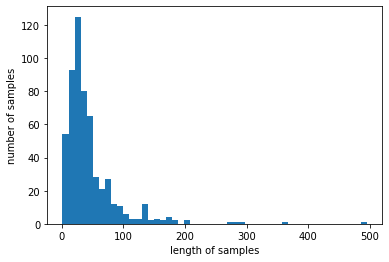

In [ ]:
#패딩
print('댓글의 최대 길이 :',max(len(l) for l in X_train))
print('댓글의 평균 길이 :',sum(map(len, X_train))/len(X_train))
plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [ ]:
max_len = 300
below_threshold_len(max_len, X_train)

전체 샘플 중 길이가 300 이하인 샘플의 비율: 99.64285714285714


In [ ]:
X_train = pad_sequences(X_train, maxlen = max_len)
X_test = pad_sequences(X_test, maxlen = max_len)

In [ ]:
#LSTM으로 유투브 댓글 분류하기
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, 4)
y_test = to_categorical(y_test, 4)

In [ ]:
model = Sequential()
model.add(Embedding(vocab_size, 100))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(4, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

epochs = 5
batch_size = 64

#model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=15, callbacks=[es, mc], batch_size=60, validation_split=0.2)
#X_train을 두개 넣어야한다, embedding도 같이해야한다
#title 

Epoch 1/15
8/8 [==============================] - 10s 890ms/step - loss: 1.3831 - accuracy: 0.3054 - val_loss: 1.3729 - val_accuracy: 0.3393
Epoch 2/15
8/8 [==============================] - 7s 833ms/step - loss: 1.3555 - accuracy: 0.3880 - val_loss: 1.3343 - val_accuracy: 0.2768
Epoch 3/15
8/8 [==============================] - 7s 825ms/step - loss: 1.2949 - accuracy: 0.4297 - val_loss: 1.3013 - val_accuracy: 0.4018
Epoch 4/15
8/8 [==============================] - 7s 829ms/step - loss: 1.2590 - accuracy: 0.4976 - val_loss: 1.4780 - val_accuracy: 0.3125
Epoch 5/15
8/8 [==============================] - 7s 826ms/step - loss: 1.1991 - accuracy: 0.5079 - val_loss: 1.2330 - val_accuracy: 0.5714
Epoch 6/15
8/8 [==============================] - 7s 842ms/step - loss: 1.0847 - accuracy: 0.7555 - val_loss: 1.1407 - val_accuracy: 0.6250
Epoch 7/15
8/8 [==============================] - 7s 828ms/step - loss: 0.9116 - accuracy: 0.7708 - val_loss: 0.9807 - val_accuracy: 0.5982
Epoch 8/15
8/8 [===

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred_ = []
for i in range(len(y_pred)):
  arg = np.argmax(y_pred[i])
  y_pred_.append(arg)

In [ ]:
y_test_ = []
for i in range(len(y_test)):
  arg = np.argmax(y_test[i])
  y_test_.append(arg)

140

In [ ]:
print(classification_report(y_pred_,y_test_))

              precision    recall  f1-score   support

           0       0.93      0.81      0.86        31
           1       0.83      0.83      0.83        53
           2       0.73      0.69      0.71        39
           3       0.74      1.00      0.85        17

    accuracy                           0.81       140
   macro avg       0.81      0.83      0.81       140
weighted avg       0.81      0.81      0.81       140



#워드벡터로 합치기

In [ ]:
len(X_train)

560

In [ ]:
len(X_train1)

551

In [ ]:
#LSTM으로 유투브 댓글 분류하기
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, 4)
y_test = to_categorical(y_test, 4)

In [ ]:
X_train

array([[  0,   0,   0, ...,  64,  17,  17],
       [  0,   0,   0, ...,   1, 350, 210],
       [  0,   0,   0, ..., 140,  89, 141],
       ...,
       [  0,   0,   0, ...,  22,   3, 365],
       [  0,   0,   0, ..., 313, 253, 431],
       [  0,   0,   0, ...,  62,  20,  65]], dtype=int32)

In [ ]:
X_train1

array([[  0,   0,   0, ...,   1, 323,   1],
       [  0,   0,   0, ..., 324,  21, 136],
       [  0,   0,   0, ...,  15,  33,   5],
       ...,
       [  0,   0,   0, ..., 143, 469,  93],
       [  0,   0,   0, ...,   2, 215,  36],
       [  0,   0,   0, ...,  21, 206,  45]], dtype=int32)

In [ ]:
model = Sequential()
model.add(Embedding(vocab_size, 100))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(4, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

epochs = 5
batch_size = 64

#model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
history = model.fit(X_train, X_train1, y_train, epochs=15, callbacks=[es, mc], batch_size=60, validation_split=0.2)

#X_train을 두개 넣어야한다, embedding도 같이해야한다
#title 

y_pred = model.predict(X_test)

TypeError: ignored

In [ ]:
y_pred_ = []
for i in range(len(y_pred)):
  arg = np.argmax(y_pred[i])
  y_pred_.append(arg)


y_test_ = []
for i in range(len(y_test)):
  arg = np.argmax(y_test[i])
  y_test_.append(arg)

In [ ]:
print(classification_report(y_pred_,y_test_))

              precision    recall  f1-score   support

           0       0.05      0.19      0.08        31
           1       0.04      0.02      0.03        53
           2       0.00      0.00      0.00        39
           3       0.00      0.00      0.00        17

    accuracy                           0.05       140
   macro avg       0.02      0.05      0.03       140
weighted avg       0.03      0.05      0.03       140



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# 모델이 잘못 분류한 데이터 살펴보기

In [ ]:
import numpy as np

a = np.array(y_pred_)
b = np.array(y_test_)
c = a==b
np.where(c==False)
test_data['tokenized'].iloc[2]




In [ ]:
a = np.array(y_pred_)
b = np.array(y_test_)

In [ ]:
c = a==b

In [ ]:
np.where(c==False)

(array([  0,   1,   3,   4,   6,   7,   8,   9,  10,  11,  12,  13,  14,
         15,  16,  18,  21,  22,  23,  24,  25,  26,  27,  28,  29,  30,
         31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,  43,
         44,  45,  46,  48,  49,  50,  51,  52,  53,  54,  55,  56,  58,
         59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  70,  71,  73,
         75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  87,  88,
         89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101,
        103, 105, 106, 107, 109, 110, 112, 114, 116, 117, 118, 119, 120,
        121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131]),)

In [ ]:
test_data['tokenized'].iloc[2]# 케이스 스터디를 할 때 이런 케이스가 좋은 케이스, 좋은 제안을 줘야한다. 
# 모델을 발전할 수 있는 방향을 전달해줘야한다
#이런 결과가 나왔는데 이런 결과는 이렇게 되었고 
# 이런 케이스를 안만들려면 데이터 수를 늘리거나, "피온" 이런 고유 명사를 제거하고 하거나, 고유 명사에대한 사전을 만들어서 진행

KeyError: ignored

In [ ]:
print(y_pred_[2])
print(y_test_[2])

In [ ]:
print(test_data['tokenized'].iloc[5])
print(y_pred_[5])
print(y_test_[5])

In [ ]:
print(test_data['tokenized'].iloc[8])
print(y_pred_[8])
print(y_test_[8])

In [ ]:
print(test_data['tokenized'].iloc[17])
print(y_pred_[17])
print(y_test_[17])

In [ ]:
print(test_data['tokenized'].iloc[20])
print(y_pred_[20])
print(y_test_[20])

편의점 알바하면 찾아오는 진상들이 한 번에 다 온다면 ㅋㅋㅋ  챗 상황극진짜 믿고 보는 고멤 분 순삭 당했습니다 길이길이 남을 역작 번째 돌려보는중 고멤은 지옥이다 팀장꼰대진상할배호를 맡은 띵킹입니다 고멤은 지옥이다 정말 함께해주신 모든 분들 각본쓰고 연기해주신 고멤 여러분 맵 제작의 킴카멘님 잉푸님 저는 차려놓은 밥상에 그저 숟가락 하나만 올려놨을 뿐입니다 모두 함께 이런 좋은 작품 만들수 있어서 너무 행복하고 감사했습니다 앞으로 고멤 활동 열심히 하고 항상 재밌는 띵킹이 되겠습니다 왁굳님 항상 존경하고 사랑합니다 감사합니다 컨텐츠 일주일 남기고 아무것도 없이 모였습니다 고멤 모두가 일주일 내내 매일 밤새면서 머리싸매고 다같이 세계관스토리연출 아이디어 내가면서 열심히 했습니다 저희가 고멤이었기에 열정하나로 모인거였기에 좋은 결과가 나왔던것같아요 그렇기에 고멤이 아니신데도 매일 밤새며 맵 만드셨던 맵 제작자분들이 정말 대단했던것같습니다 맵 제작자분들 고멤분들 다들 정말 고생하셨습니다 제 입장의 비하인드 제가 고기를 씹는장면때는 동동쿤님이 풀트래킹으로 몸연기를하고 저는 고기를 씹는 소리만 냈습니다 저는 사람고기를 씹는 소리를 연출하기위해 육회만원어치를 깍둑썰기로 준비해 씹었습니다 육회를 먹어보는게 처음이었는데 막상 씹어보니 씹는소리는 잘 났지만 연기하며 삼키기가 너무 버거워 휴지에 뱉고 새로운 고기를 씹고를 반복했습니다 최종리허설까지도 없었는데 실전때 과몰입을 너무 하다보니 마지막 추격장면때 왁굳님이 저와 주르르님 사이를 방해한다고 생각이 드니 너무 속상하고 분해서 눈물이 흐르더라구요 주르르님 연습할땐 연기 못했는데 실전때 저 경멸하는 연기가 나오길래 진짜 저를 경멸하나싶었습니다주륵 재밌게 봐주신 여러분 정말 감사합니다 덕분에 저희 모두 매일 밤새며 고생했던게 더 보람있었던것같습니다 앞으로도 왁굳님의 고멤 컨텐츠 많이 좋아해주시고 응원해주시면 감사하겠습니다 감정에 벅차 눈물이 글썽이지만 다급하게 숨기며 뒤로도는 냉참 감 감사합니다 그리고 저 실제로 안저래요착해요

In [ ]:
print(test_data['tokenized'].iloc[21])
print(y_pred_[21])
print(y_test_[21])

콩혼자산다  이마트 노브랜드 식품 개 리뷰  연두콩 저도 노브랜드 제품들 너무 좋아해요 여기 나온것들 다 좋아한다는건 안 비밀 가성비가 진짜 좋은 것 같아요 머리에 왕먼지 붙었어요 거슬리게해서 죄송합니다 담엔 꼭 영상 찍기 전에 확인 할게요오 머리삼각김밥 노브랜드는원참좋아하는듯 여러분 이번에도 알람 안 갔나요오 
2
3


In [ ]:
#case study 발표 자료를 만들어서 : 모델의 한계점 분석 및 발전 방향 제시
# 문장이 길긴 한데 중요한 단어들이 
#ex) 조효진 - 레이블 
# 뷰티유투버가 먹방하면 라벨링이 애매하다 

In [ ]:
# 결과 분석 : 제목과 댓글을 같이 분류할 시 정확도가 85프로까지 올라감.

In [ ]:
# 1. 데이터 라벨링을 하지 않을 때 : 70-80
# 2. 데이터 라벨링을 할 때 : 75-80
# 3. 제목을 함께 고려할시 : 85%
# 

#테스트 데이터
# 1. 댓글 상위 5개
# 2. 댓글 상위 15개 

In [ ]:
# 정확도가 안나오면, 

비교대상 1 - RandomForest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf_clf = RandomForestClassifier()

In [ ]:
len(X_train)

560

In [ ]:
len(y_train)

560

In [ ]:
y_train

array([[[0., 1., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.]],

       [[1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [0., 1., 0., 0.]],

       [[0., 1., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.]],

       ...,

       [[1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [0., 1., 0., 0.]],

       [[0., 1., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.]],

       [[1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [1., 0., 0., 0.]]], dtype=float32)

In [ ]:
y_train1 = []
for i in range(len(y_train)):
  arg = np.argmax(y_train[i])
  y_train1.append(arg)

In [ ]:
len(y_train1)

560

In [ ]:
y_train1

[1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,


In [ ]:
rf_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
X_train.shape

(560, 300)

In [ ]:
y_train.shape

(560, 4)

In [ ]:
y_train = np.array(train_data['label'])
y_test = np.array(test_data['label'])

In [ ]:
y_train

array([0, 3, 0, 3, 1, 1, 2, 1, 2, 1, 1, 2, 0, 2, 1, 3, 1, 2, 0, 1, 2, 2,
       0, 1, 0, 2, 0, 0, 2, 1, 3, 2, 2, 0, 3, 0, 0, 3, 2, 2, 0, 0, 2, 0,
       3, 0, 2, 2, 0, 0, 1, 2, 1, 2, 1, 3, 2, 2, 1, 1, 1, 0, 1, 3, 1, 3,
       3, 2, 0, 2, 2, 3, 1, 0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 2, 1, 2, 1, 0,
       3, 1, 3, 1, 1, 2, 2, 0, 1, 0, 2, 1, 0, 0, 3, 0, 0, 0, 1, 0, 3, 2,
       2, 3, 2, 1, 3, 2, 1, 2, 1, 0, 3, 2, 1, 1, 0, 1, 3, 3, 2, 0, 2, 0,
       0, 2, 2, 0, 3, 2, 1, 3, 0, 0, 0, 3, 1, 0, 2, 0, 2, 0, 3, 0, 2, 2,
       1, 2, 2, 3, 0, 2, 2, 1, 2, 2, 2, 3, 0, 0, 1, 2, 2, 3, 1, 3, 0, 0,
       0, 3, 2, 3, 0, 2, 1, 2, 1, 0, 3, 1, 3, 1, 1, 2, 2, 0, 1, 0, 1, 1,
       0, 3, 1, 0, 2, 2, 0, 0, 1, 0, 2, 2, 0, 0, 0, 1, 0, 2, 1, 0, 3, 2,
       0, 3, 3, 3, 0, 1, 3, 2, 3, 0, 0, 0, 3, 1, 1, 1, 0, 1, 1, 3, 3, 0,
       0, 0, 1, 3, 0, 0, 0, 3, 0, 2, 1, 2, 2, 1, 0, 2, 1, 2, 3, 1, 1, 0,
       3, 1, 2, 2, 2, 3, 0, 0, 0, 3, 0, 3, 1, 2, 0, 0, 0, 1, 2, 1, 1, 2,
       3, 2, 1, 2, 3, 0, 0, 1, 2, 0, 3, 1, 3, 0, 0,

In [ ]:
rf_pred = rf_clf.predict(X_test)

In [ ]:
y_test

array([1, 0, 1, 1, 2, 1, 2, 0, 1, 2, 3, 2, 2, 1, 2, 2, 0, 3, 3, 2, 1, 3,
       1, 1, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 0, 0, 1, 1, 2, 1, 0, 1, 1, 2,
       3, 2, 3, 2, 1, 3, 2, 2, 1, 1, 1, 3, 1, 0, 1, 3, 2, 1, 1, 1, 3, 1,
       1, 2, 1, 3, 2, 0, 0, 0, 1, 3, 2, 3, 0, 1, 2, 1, 3, 0, 1, 3, 1, 1,
       2, 1, 3, 1, 1, 3, 1, 2, 3, 1, 2, 0, 1, 0, 3, 2, 1, 0, 2, 0, 2, 2,
       1, 0, 0, 2, 1, 1, 1, 0, 1, 2, 1, 2, 2, 3, 1, 0, 3, 1, 3, 1, 2, 3,
       2, 0, 2, 2, 1, 0, 0, 0])

In [ ]:
rf

In [ ]:
y_test_ = []
for i in range(len(y_test)):
  arg = np.argmax(y_test[i])
  y_test_.append(arg)

In [ ]:
rf_pred

array([1, 2, 1, 1, 3, 0, 3, 0, 1, 3, 2, 0, 0, 2, 1, 1, 0, 2, 0, 1, 3, 0,
       1, 2, 2, 2, 1, 2, 0, 1, 1, 2, 1, 0, 0, 0, 1, 1, 2, 0, 2, 0, 1, 0,
       2, 2, 0, 2, 0, 3, 0, 2, 1, 1, 2, 0, 1, 2, 0, 0, 2, 1, 0, 0, 0, 3,
       2, 2, 0, 0, 0, 0, 1, 1, 1, 2, 2, 3, 2, 1, 1, 0, 0, 2, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 2, 0, 1, 3, 1, 2, 2, 1, 0, 3, 2, 2, 0, 0, 0, 2, 2,
       0, 1, 1, 1, 2, 1, 2, 0, 2, 2, 1, 2, 2, 3, 0, 1, 2, 1, 2, 1, 0, 2,
       0, 0, 1, 3, 1, 0, 0, 0])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(rf_pred,y_test))

              precision    recall  f1-score   support

           0       0.48      0.29      0.36        45
           1       0.55      0.66      0.60        44
           2       0.43      0.40      0.42        40
           3       0.22      0.45      0.29        11

    accuracy                           0.45       140
   macro avg       0.42      0.45      0.42       140
weighted avg       0.47      0.45      0.45       140



비교대상 2 - 선형 분류

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
g_nb = GaussianNB([0.2785714285714286, 0.25, 0.2875, 0.18392857142857144])

In [ ]:
arr, num = np.unique(y_train, return_counts=True)

In [ ]:
numl = num.tolist()
for i in range(len(numl)):
  numl[i] = numl[i]/len(y_train)
numl

[0.2785714285714286, 0.25, 0.2875, 0.18392857142857144]

In [ ]:
X_train

array([[  0,   0,   0, ...,  64,  17,  17],
       [  0,   0,   0, ...,   1, 350, 210],
       [  0,   0,   0, ..., 140,  89, 141],
       ...,
       [  0,   0,   0, ...,  22,   3, 365],
       [  0,   0,   0, ..., 313, 253, 431],
       [  0,   0,   0, ...,  62,  20,  65]], dtype=int32)

In [ ]:
y_train

array([0, 3, 0, 3, 1, 1, 2, 1, 2, 1, 1, 2, 0, 2, 1, 3, 1, 2, 0, 1, 2, 2,
       0, 1, 0, 2, 0, 0, 2, 1, 3, 2, 2, 0, 3, 0, 0, 3, 2, 2, 0, 0, 2, 0,
       3, 0, 2, 2, 0, 0, 1, 2, 1, 2, 1, 3, 2, 2, 1, 1, 1, 0, 1, 3, 1, 3,
       3, 2, 0, 2, 2, 3, 1, 0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 2, 1, 2, 1, 0,
       3, 1, 3, 1, 1, 2, 2, 0, 1, 0, 2, 1, 0, 0, 3, 0, 0, 0, 1, 0, 3, 2,
       2, 3, 2, 1, 3, 2, 1, 2, 1, 0, 3, 2, 1, 1, 0, 1, 3, 3, 2, 0, 2, 0,
       0, 2, 2, 0, 3, 2, 1, 3, 0, 0, 0, 3, 1, 0, 2, 0, 2, 0, 3, 0, 2, 2,
       1, 2, 2, 3, 0, 2, 2, 1, 2, 2, 2, 3, 0, 0, 1, 2, 2, 3, 1, 3, 0, 0,
       0, 3, 2, 3, 0, 2, 1, 2, 1, 0, 3, 1, 3, 1, 1, 2, 2, 0, 1, 0, 1, 1,
       0, 3, 1, 0, 2, 2, 0, 0, 1, 0, 2, 2, 0, 0, 0, 1, 0, 2, 1, 0, 3, 2,
       0, 3, 3, 3, 0, 1, 3, 2, 3, 0, 0, 0, 3, 1, 1, 1, 0, 1, 1, 3, 3, 0,
       0, 0, 1, 3, 0, 0, 0, 3, 0, 2, 1, 2, 2, 1, 0, 2, 1, 2, 3, 1, 1, 0,
       3, 1, 2, 2, 2, 3, 0, 0, 0, 3, 0, 3, 1, 2, 0, 0, 0, 1, 2, 1, 1, 2,
       3, 2, 1, 2, 3, 0, 0, 1, 2, 0, 3, 1, 3, 0, 0,

In [ ]:
X_train.shape

(560, 300)

In [ ]:
y_train.shape

(560,)

In [ ]:
g_nb.fit(X_train, y_train)
g_nb_pred = g_nb.predict(X_test)

In [ ]:
g_nb_pred

array([1, 1, 1, 1, 3, 1, 0, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1,
       1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 3, 1, 1, 1, 1, 3, 1, 1, 3,
       1, 1, 1, 3, 1, 1, 1, 1])

In [ ]:
print(classification_report(g_nb_pred,y_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.96      0.42      0.59       120
           2       0.00      0.00      0.00         0
           3       0.35      0.42      0.38        19

    accuracy                           0.42       140
   macro avg       0.33      0.21      0.24       140
weighted avg       0.87      0.42      0.56       140



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
sentiment -> case study로 
발표: 왜 연구를 했는가
데이터 수집 , 라벨링
데이터 분석 설명 : 카테고리별 frequen 단어, 단어별 특징, 단어 뽑기, 시각화
예측이 될 것이라 봤다
딮러닝을 가지고 학습
예측 이렇게했다 : LSTM , RNN, SVM, Randomforest, 
Svm 토큰화 한다음 word count vecterize 
logistic 생짜로 hyper 구하지 말고 


추가적으로: 뷰티 유투버가 먹방하는 것을 예측해봤다
우리 모델이 잘 맞출까?

영상 제목 분류
영상 댓글 분류
->영상의 제작자의 택스트 보다 영상을 보고 텍스트를 다는 사람들의 댓글에 영상에 대한 정보가 더 많을 것이다. 
->어플리케이션, 활용방법
ex) 우리모델을 사용하면 비디오 카테고라이션 자동화를 할때 비디오가 채널에 얽메이지않고 댓글을 보고 하는게 유의미가 있더라. 

** 왜 필요한가? 가장 중요하다. **문제 설정을 명확하게 하기
정확하게 설득을 해야한다. 이게 정말 필요하고, 우리가 꼭 해야했다. 

딥러닝을 활용한 유투브 영상 댓글 택스트 분석 통한 영상 카테고라이션 자동화


->왜 중요? 영상을 올릴 시 해당 영상이 어떤 카테고리에 속하는지 분류 할 수 있다 -> 한계점 : 댓글이 없으면 분류할 수가 없다

-> 게임 유투버가 먹방도 찍어서 올리니까, 다이나믹한 상황을 반영하지 못하기 때문, 영상을 분류하는 지표로 댓글을 사용하자
-> 썸네일, 타이틀,댓글 분류 머신러닝 모델 넣어서 분류 
-> 비디오 카테고라이션이 왜 중요한지? 모든 시스템은 자동화가 되기 때문에 비디오를 분류할때 feature study를 통해서 어떤 게 중요한지 확인해봤다.
-> 실제로 title이 카테고리에서 중요하다 : 좀더 효율적으로 
-> 비디오 콘텐츠에서 어떤 부분을 카테고라이션에 사용할 수 있을지 확인한거다
-> 여러 피쳐를 고려함으로써 상위 5개 댓글 늘려가면 성능이 늘어나기 때문에 
-> 영상 기반으로 하고 있지만 댓글을 활용할 수 있더라
-> 처음 영상올릴때는 영상, 타이틀 기반 자동 분류가 되는데 거기에 댓글이 추가되면 명확한 카테고라이션이 될 수 있다. 
->영상이 올라오는 순간에 되어야 의미가 있는건데? 저희가 생각하는거는 처음에는 타이틀가지고 분류되지만 추후에 영상의 댓글이 달릴 수록 저희 모델이 명확한 카테고리로 분류하게 되지 않을까
Q.


In [ ]:
우리가 해야하는것

- class report 너가  - 오늘
- svm, logistic 동혁  -  금요일
- 각 카테고리별 단어 - 내가 금요일
- 시각화 - 분야 별 word cloud - 내가  금요일


- case study 
- 크롤링 ( 유투버 선정 후 운동 유투버 -> 게임 영상)
                                뷰티 -> 운동
                                게임 -> 운동
                                15개  
              카테고리 3개 600개 -> 뷰티 게임 운동 
              - 일요일까지 마치기 

게임 유투버 : 운동하는것 - 게임 


In [ ]:
sentiment_predict(str(dataset.loc[[30],['comment_text']]))

0.22230780124664307

In [ ]:
sentiment_predict(str(dataset.loc[[21],['comment_text']]))

0.9577650427818298

In [ ]:
sentiment_predict(str(dataset.loc[[2],['comment_text']]))

0.3401302099227905

In [ ]:
txt = str(dataset.loc[[2],['comment_text']])
seq = tokenizer.texts_to_sequences(txt)
padded = pad_sequences(seq, maxlen=500)
pred = model.predict(padded)
labels = [[1., 0., 0.], [0., 1., 0.],[0., 0., 1.]]
print(pred)
#print(pred, labels[np.argmax(pred)])

#새로운 데이터 가지고 시험해보기


https://www.youtube.com/watch?v=w-ocwcZXLRs 운동 -> 게임
https://www.youtube.com/watch?v=bJvM2lUwV7s 게임 -> 운동
https://www.youtube.com/watch?v=kLKSX7r4Rjc 운동 -> 게임
https://www.youtube.com/watch?v=TulSSsTBZe0 운동 -> 게임
https://www.youtube.com/watch?v=9D26DwCGZaY 운동->뷰티
https://www.youtube.com/watch?v=YIxospNFYMw 운동 -> 뷰티(패션)
https://www.youtube.com/watch?v=uuWF5Odh-Ws 게임 -> 뷰티
https://www.youtube.com/watch?v=Shy6hG742A4 게임 -> 뷰티
https://www.youtube.com/watch?v=BWioTl2oSmc 게임 -> 운동
https://www.youtube.com/watch?v=QwqKpk_ugZ8 게임 -> 운동
https://www.youtube.com/watch?v=sVqteRw0D34 게임 -> 운동
https://www.youtube.com/watch?v=7RK01KODzOQ 운동 -> 게임
https://www.youtube.com/watch?v=NhO4wmCYVDs 운동 -> 게임
https://www.youtube.com/watch?v=o_UMB1eP00k 게임 -> 운동
https://www.youtube.com/watch?v=0HVOKqI9jg8 운동 -> 뷰티

In [ ]:
df = pd.read_csv('new_target_fin2.csv',encoding='cp949')

In [ ]:
df.head()

,title,view,like,unlike,comment,date,comment_text,label
0,헬스장 열 때까지 협곡에서 운동할게요,475608,6000,134,1403,2021.1.11,그래서 이 형 티어 어디임 이게 웃긴데 여러분 견갑골은 이렇게 닫아야 해요 전설의...,1
1,[4K] 롤붕 형아랑 가슴 운동할까,179700,2000,36,558,2021.3.27,코뚱이가 바벨 만지니까 바벨도 헤으응이러네 플랫벤치 최소셋 덤벨프레스 최소 셋 친업...,2
2,페이커님 꼭 봐주세요,1387952,2000,409,6250,2020.8.18,그래서 계란님 티어가 와 그래서 숙소에 초 절 정 스미스머신이 있구나 경험자로써 댓...,1
3,도구도 인권이 있다,174941,2000,43,1026,2021.2.5,도구가 말을하네 대 이상만 듀오가능 핑 찍을 때 마다 대흉근 꼼지락 거리는거 웃기네...,1
4,똥손대결 투표해주세요오^^,61872,676,22,122,2021.3.10,전신을 단련하느라 손재주를 잃었습니다 솔직히 나 진짜 한 대 맞은 메이크업이다 진심...,0


In [ ]:
df['title']

0                                  헬스장 열 때까지 협곡에서 운동할게요
1                                   [4K] 롤붕 형아랑 가슴 운동할까
2                                           페이커님 꼭 봐주세요
3                                            도구도 인권이 있다
4                                        똥손대결 투표해주세요오^^
5                                몸짱들이 사복을 입으면 핏이 정말 좋을까
6             이러니까 인스타랑 똑같은데요 [왓츠인마이백/What's in my bag]
7     유소나] 소나의 애정하는 화장품 공개 치약부터 바디까지 이거 진짜 좋아요 (feat...
8              sub) 게임만 10년한 남자의 -30kg 다이어트  -30kg DIET
9                         [4K] 3대 660 현실 드레이븐 가벼운 가슴 운동
10                                   헬창이 되고싶었던 한 오이의 도전
11                                   3대 660한테 정치질이 통하겠냐
12                                  '롤'하면 다른 인격이 나오는 남자
13    헬스장 PT 아르바이트트레이너가 무슨 일을 하는지 알아보자 시급 10000원 [테스터훈]
14                           SNS 셀카용 청순메이크업 도전기 (메알못 팁)
Name: title, dtype: object

In [ ]:
len(df)

15

In [ ]:
X1  = dataset['comment_text']
y1  = dataset['label']

In [ ]:
df.drop_duplicates(subset = ['comment_text'], inplace=True) # document 열에서 중복인 내용이 있다면 중복 제거
df['comment_text'] = df['comment_text'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") # 정규 표현식 수행
df['comment_text'] = df['comment_text'].str.replace('^ +', "") # 공백은 empty 값으로 변경
df['comment_text'].replace('', np.nan, inplace=True) # 공백은 Null 값으로 변경
df = df.dropna(how='any') # Null 값 제거
print('전처리 후 테스트용 샘플의 개수 :',len(df))

전처리 후 테스트용 샘플의 개수 : 15


In [ ]:
X_test1 = []
for sentence in df['comment_text']:
    temp_X = okt.morphs(sentence, stem=True) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    X_test1.append(temp_X)

In [ ]:
X_test1 = tokenizer.texts_to_sequences(X_test1)

In [ ]:

y_test1 = np.array(df['label'])

In [ ]:
y_test1

array([1, 2, 1, 1, 0, 0, 0, 0, 2, 2, 2, 1, 1, 2, 0])

In [ ]:
X_test1 = pad_sequences(X_test1, maxlen = max_len)

In [ ]:
X_test1.shape

(15, 400)

In [ ]:
y_pred1 = model.predict(X_test1)

In [ ]:
y_pred_1 = []
for i in range(len(y_pred1)):
  arg = np.argmax(y_pred1[i])
  y_pred_1.append(arg)

In [ ]:
y_pred_1

[3, 2, 2, 2, 1, 2, 2, 0, 2, 2, 2, 2, 3, 1, 1]

In [ ]:
y_test1

array([1, 2, 1, 1, 0, 0, 0, 0, 2, 2, 2, 1, 1, 2, 0])

In [ ]:
print(classification_report(y_pred_1,y_test1))

              precision    recall  f1-score   support

           0       0.20      1.00      0.33         1
           1       0.00      0.00      0.00         3
           2       0.80      0.44      0.57         9
           3       0.00      0.00      0.00         2

    accuracy                           0.33        15
   macro avg       0.25      0.36      0.23        15
weighted avg       0.49      0.33      0.37        15



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#댓글을 같이 고려하여 테스트 할시

In [ ]:
df = pd.read_csv('new_target_fin2.csv',encoding='cp949')

In [ ]:
df.head()

,title,view,like,unlike,comment,date,comment_text,label,tokenized
0,헬스장 열 때까지 협곡에서 운동할게요,475608,6000,134,1403,2021.1.11,그래서 이 형 티어 어디임 이게 웃긴데 여러분 견갑골은 이렇게 닫아야 해요 전설의...,1,헬스장 열 때까지 협곡에서 운동할게요그래서 이 형 티어 어디임 이게 웃긴데 여러분...
1,[4K] 롤붕 형아랑 가슴 운동할까,179700,2000,36,558,2021.3.27,코뚱이가 바벨 만지니까 바벨도 헤으응이러네 플랫벤치 최소셋 덤벨프레스 최소 셋 친업...,2,롤붕 형아랑 가슴 운동할까코뚱이가 바벨 만지니까 바벨도 헤으응이러네 플랫벤치 최소셋...
2,페이커님 꼭 봐주세요,1387952,2000,409,6250,2020.8.18,그래서 계란님 티어가 와 그래서 숙소에 초 절 정 스미스머신이 있구나 경험자로써 댓...,1,페이커님 꼭 봐주세요그래서 계란님 티어가 와 그래서 숙소에 초 절 정 스미스머신이 ...
3,도구도 인권이 있다,174941,2000,43,1026,2021.2.5,도구가 말을하네 대 이상만 듀오가능 핑 찍을 때 마다 대흉근 꼼지락 거리는거 웃기네...,1,도구도 인권이 있다도구가 말을하네 대 이상만 듀오가능 핑 찍을 때 마다 대흉근 꼼지...
4,똥손대결 투표해주세요오^^,61872,676,22,122,2021.3.10,전신을 단련하느라 손재주를 잃었습니다 솔직히 나 진짜 한 대 맞은 메이크업이다 진심...,0,똥손대결 투표해주세요오전신을 단련하느라 손재주를 잃었습니다 솔직히 나 진짜 한 대 ...


In [ ]:
df['tokenized'] = df['title'] + df['comment_text']

In [ ]:
df['tokenized'].iloc[0]

'헬스장 열 때까지 협곡에서 운동할게요그래서 이 형 티어 어디임 이게 웃긴데  여러분 견갑골은 이렇게 닫아야 해요 전설의 쌉소리장인  전체적으로 리엑션 꿀잼이네 말서준  새해 첫 마프대란 일정 월 일 일 월 일 월 이벤트 내용 전제품 최대 타임세일 특가할인코드 입력시 추가 할인 추천의류 구매시 최종결제금액 추가 자동할인 만원만원만원이상 구매시 사은품 증정 마이프로틴 말왕 구독자 이벤트 월일 월 일 타임세일 기간 중 말왕 링크를 통하여 구매를 완료한 고객들 중 총 명을 선정하여 하기 상품을 제공합니다 마이프로틴 만원 할인권 명 마이프로틴 만원 할인권 명 마이프로틴만원 할인권 명 마이프로틴 원더 우먼 한정판 박스 명 크리스마스 선물 이벤트 당첨자 명단 응 일겜 도 잘먹고 상황파악도 잘하는데 몸이 안따라주네형도 늙었다 오빠 좀 더 격하게 해줘 영상 간결 요약 의상 울짖마 편집 인트로 괴물쥐 유행어 저라뎃 코뚱이 울부지는 괴뚱말왕 오우 저치기 진짜 거짓말 안하고 썸네일만 보고 울짖마인줄 알고 들어왔습니다 '

In [ ]:
df['tokenized'].iloc[2]

'페이커님 꼭 봐주세요그래서 계란님 티어가 와 그래서 숙소에 초 절 정 스미스머신이 있구나 경험자로써 댓글적습니다 하루에 평균시간씩 게임하는 프로게이머 기준으로 시간씩 운동꾸준히 해주면 게임할때 집중이 더잘됩니다 결론 휴식도 좋지만 하루 한시간씩만 시간내서 기본운동만 해줘도 게임할때 더 집중을잘할수있다  운동을 하면 편집 집중력도 늘어나는거죠 라이즈가 설명하니깐 확 믿음이 가네 니 버려 우리 할머니가 그것보단 잘 먹겠다 아이상한데 해설 전 서포터 출신입니다 최근에 운동시작해서 대 정도 치는데 운동하고 나면 그랩각 더 잘보입니다 근데 노안와서 티어는 못올라갑니다 그럼이만 형님 말씀하실때 따봉가위보자기 반복하시는 이유가 궁금합니다 공원뛰러감 상담 문의 드립니다 연락 주세요 그렇게 페이커는 무사트 기에 도전하게 되고 저 대 인데 브론즈인데요 방금도 운동 끝나고 상쾌하게 트롤링 두 판 했습니다 운동을 하면 를 더 잘 먹을수 있다 페이커가 를 놓치는 경우가 있다 페이커보고 봐달라고하는 제목이다 가짜사나이는 운동이다 페이커보고 가짜사나이에 와달라는거다 이거보고있는 양시경 같이 롤하자 '

In [ ]:
df['title'].iloc[2]

'페이커님 꼭 봐주세요'

In [ ]:
df['tokenized'].iloc[13]

'헬스장 PT 아르바이트트레이너가 무슨 일을 하는지 알아보자 시급 10000원 [테스터훈]오빠 이제 진짜 운동 좀 하자 알바훈이 아니라 헬스훈 컨텐츠 하나 만들어야겠네 형이렇게 몸이 컸었나 일어나있는거보니까 개크다 저 안마기 멈추는거 겁나게 웃기네원래 안 멈추지않나 돌아온 아르바이트훈 시즌 테스터훈의 다음 아르바이트는 어디로 갈지 기대 많이 해주세요 직접 찾아갑니다 영상 재밌게 보셨다면 좋아요 구독하기 알람설정 레츠기릿 트레이너님 가만히 있으시면 근손실 일어납니다 저렇게 말해줘도 참 안타깝다 형 진지해져봐 좀 갑자기 트월킹 조지네 아 진짜 여기보고 한참 뿜었다 표정 웃기네 겁나 웃기네 환장 정말믿음직한트레이너테스터훈 재밌게 보다가도 중간 중간 심각하게 지켜보게 되더라 형이젠 건강 챙기자 체중 증가 목적이면 등 트레이너훈 형 어쩨 남자한테는 달라붙고 여자한테는 떨어져있다 형 설마 에이설마 '

In [ ]:
df['title'].iloc[13]

'헬스장 PT 아르바이트트레이너가 무슨 일을 하는지 알아보자 시급 10000원 [테스터훈]'

In [ ]:
df['tokenized'] 

0     헬스장 열 때까지 협곡에서 운동할게요그래서 이 형 티어 어디임 이게 웃긴데  여러분...
1     롤붕 형아랑 가슴 운동할까코뚱이가 바벨 만지니까 바벨도 헤으응이러네 플랫벤치 최소셋...
2     페이커님 꼭 봐주세요그래서 계란님 티어가 와 그래서 숙소에 초 절 정 스미스머신이 ...
3     도구도 인권이 있다도구가 말을하네 대 이상만 듀오가능 핑 찍을 때 마다 대흉근 꼼지...
4     똥손대결 투표해주세요오전신을 단련하느라 손재주를 잃었습니다 솔직히 나 진짜 한 대 ...
5     몸짱들이 사복을 입으면 핏이 정말 좋을까 등은 지피티로 하겠습니다 떼아가 등인걸로 ...
6     이러니까 인스타랑 똑같은데요 왓츠인마이백   괴물쥐와 수야의 공통점 현재 장기휴방 ...
7     유소나 소나의 애정하는 화장품 공개 치약부터 바디까지 이거 진짜 좋아요 시드물 시드...
8     게임만 년한 남자의  다이어트   여러분 저는 이제 시작입니다 끝이아니고 이제 시작...
9     대  현실 드레이븐 가벼운 가슴 운동풀템잭스 무섭다 드레이븐이 왜 소환사님 말을 잘...
10    헬창이 되고싶었던 한 오이의 도전한미 연합군에 대항하기위해 훈련중인 과로사 로사는 ...
11    대 한테 정치질이 통하겠냐야 누가 이 형 헬스장 보내줘라 쫌 모 컽 어째 운동방송보...
12    롤하면 다른 인격이 나오는 남자저녁식사중 최고의 지원사격 우리한텐 브이로그가 필요해...
13    헬스장  아르바이트트레이너가 무슨 일을 하는지 알아보자 시급 원 테스터훈오빠 이제 ...
14    셀카용 청순메이크업 도전기 메알못 팁셀카어플은 입니다 메알못이지만 인스타그램에서 많...
Name: tokenized, dtype: object

In [ ]:
df.drop_duplicates(subset = ['tokenized'], inplace=True) # document 열에서 중복인 내용이 있다면 중복 제거
df['tokenized'] = df['tokenized'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") # 정규 표현식 수행
df['tokenized'] = df['tokenized'].str.replace('^ +', "") # 공백은 empty 값으로 변경
df['tokenized'].replace('', np.nan, inplace=True) # 공백은 Null 값으로 변경
df = df.dropna(how='any') # Null 값 제거
print('전처리 후 테스트용 샘플의 개수 :',len(df))

전처리 후 테스트용 샘플의 개수 : 15


In [ ]:
X_test1 = []
for sentence in df['tokenized']:
    temp_X = okt.morphs(sentence, stem=True) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    X_test1.append(temp_X)

In [ ]:
X_test1 = tokenizer.texts_to_sequences(X_test1)

In [ ]:
y_test1 = np.array(df['label'])

In [ ]:
X_test1 = pad_sequences(X_test1, maxlen = max_len)

In [ ]:
y_pred1 = model.predict(X_test1)

In [ ]:
y_pred_1 = []
for i in range(len(y_pred1)):
  arg = np.argmax(y_pred1[i])
  y_pred_1.append(arg)

In [ ]:
print(classification_report(y_pred_1,y_test1))

              precision    recall  f1-score   support

           0       0.60      1.00      0.75         3
           1       0.40      0.50      0.44         4
           2       0.60      0.38      0.46         8

    accuracy                           0.53        15
   macro avg       0.53      0.62      0.55        15
weighted avg       0.55      0.53      0.51        15



In [ ]:
#title만 가지고, 학습한 모델로 다시 테스트를 돌려보자 : 댓글의 정보를 가지고 영상의 카테고리를 분류하는것 (운동->게임을 하면 분류가 안되서)
#title만 했을때 정확도가 높을 때, 방향을 영상을 분류한다는 자동화한다는 것에 의미를 둔다, title과 댓글을 같이했을때 정확도가 높더라 
#모델이 테스터데이터 에서 틀린것, index 추출하여서 확인해보기
#15개가 너무 적다->영상의 수가 너무 적다 최소 100개 
#유투브 클래스 분류 관련 논문을 정리

->왜 중요? 영상을 올릴 시 해당 영상이 어떤 카테고리에 속하는지 분류 할 수 있다 -> 한계점 : 댓글이 없으면 분류할 수가 없다

-> 게임 유투버가 먹방도 찍어서 올리니까, 다이나믹한 상황을 반영하지 못하기 때문, 영상을 분류하는 지표로 댓글을 사용하자


-> 썸네일, 타이틀,댓글 분류 머신러닝 모델 넣어서 분류


-> 비디오 카테고라이션이 왜 중요한지? 모든 시스템은 자동화가 되기 때문에 비디오를 분류할때 feature study를 통해서 어떤 게 중요한지 확인해봤다.


-> 실제로 title이 카테고리에서 중요하다 : 좀더 효율적으로


-> 비디오 콘텐츠에서 어떤 부분을 카테고라이션에 사용할 수 있을지 


-> 여러 피쳐를 고려함으로써 상위 5개 댓글 늘려가면 성능이 늘어나기 때문에


-> 영상 기반으로 하고 있지만 댓글을 활용할 수 


-> 처음 영상올릴때는 영상, 타이틀 기반 자동 분류가 되는데 거기에 댓글이 추가되면 명확한 카테고라이션이 될 수 있다.


->영상이 올라오는 순간에 되어야 의미가 있는건데? 저희가 생각하는거는 처음에는 타이틀가지고 분류되지만 추후에 영상의 댓글이 달릴 수록 저희 모델이 명확한 카테고리로 분류하게 되지 않을까